# 데이터 불러오기

In [1]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'

os.getcwd()

'C:\\Users\\samsung\\Desktop\\ml_team'

In [2]:
os.chdir('./data/test')
os.listdir()

['2030여성',
 '2030여성.zip',
 'ALL_chol',
 'cho_test_결과있는사람',
 'cluster_result.csv',
 'cluster_result_not_cholesterol.csv',
 'data.CSV',
 'data2021.CSV',
 'data2022.CSV',
 'df_ord_gpt.csv',
 'df_ord_KPrototypes.csv',
 'kmeans_2030female_pipeline.pkl',
 'my_model.pkl',
 'new_new_cluster_pipeline4.pkl',
 'new_new_cluster_pipeline5.pkl',
 'new_new_new_콜레스테롤_결과있는사람2.pkl',
 'new_new_new_콜레스테롤_결과있는사람3.pkl',
 'new_콜레스테롤_결과있는사람.pkl',
 'not_chol_model.pkl',
 'real_chol_model.pkl',
 'real_cluster.csv',
 'X.csv',
 '국민건강보험공단_건강검진정보 사용자 매뉴얼_2023.hwpx',
 '생활패턴유형_소비지표.xlsx',
 '지질검사대상인데기록없는사람',
 '콜레스테롤검사한사람.csv',
 '콜레스테롤측정안한데이터.csv',
 '콜레스테롤측정안한사람.csv',
 '클러스터링_모델_dict.pkl',
 '클러스터링_파이프라인.pkl']

In [3]:
df = pd.read_csv(os.listdir()[6], encoding='cp949') 
org_df = df.copy()

# 전처리

## 결측치 처리

In [232]:
# 데이터프레임 복원
#df = org_df.copy()

In [4]:
# 전부 결측치인 컬럼 제거
for i, d in df.isna().sum().items():
    if d == df.shape[0]:
            print(f' 📌{i}는 전부 결측치이므로 컬럼을 제거합니다.')
            df.drop(columns=i,inplace=True)
            print()

for i, d in df.isna().sum().items():
    if d != 0:
        per = d/df.shape[0]*100
        if per<2:
            print(f'{i}는 결측치가 {d}개 있습니다. 약 {per:.3f}%입니다.')
            df.dropna(subset=i, inplace=True)

 📌결손치 유무는 전부 결측치이므로 컬럼을 제거합니다.

 📌치아마모증유무는 전부 결측치이므로 컬럼을 제거합니다.

 📌제3대구치(사랑니) 이상는 전부 결측치이므로 컬럼을 제거합니다.

허리둘레는 결측치가 411개 있습니다. 약 0.041%입니다.
시력(좌)는 결측치가 184개 있습니다. 약 0.018%입니다.
시력(우)는 결측치가 177개 있습니다. 약 0.018%입니다.
청력(좌)는 결측치가 137개 있습니다. 약 0.014%입니다.
청력(우)는 결측치가 138개 있습니다. 약 0.014%입니다.
수축기혈압는 결측치가 5747개 있습니다. 약 0.575%입니다.
이완기혈압는 결측치가 5747개 있습니다. 약 0.578%입니다.
식전혈당(공복혈당)는 결측치가 5814개 있습니다. 약 0.585%입니다.
혈색소는 결측치가 5817개 있습니다. 약 0.586%입니다.
요단백는 결측치가 11156개 있습니다. 약 1.123%입니다.
혈청크레아티닌는 결측치가 5814개 있습니다. 약 0.588%입니다.
혈청지오티(AST)는 결측치가 5816개 있습니다. 약 0.589%입니다.
혈청지피티(ALT)는 결측치가 5816개 있습니다. 약 0.589%입니다.
감마지티피는 결측치가 5813개 있습니다. 약 0.588%입니다.
흡연상태는 결측치가 89개 있습니다. 약 0.009%입니다.
음주여부는 결측치가 56개 있습니다. 약 0.006%입니다.


In [5]:
cols_na = []
for i, d in df.isna().sum().items():
    if d != 0:
        per = d/df.shape[0]*100
        print(f'📌{i}는 결측치가 {d}개 있습니다. 약 {per:.3f}%입니다.')
        cols_na.append(d)

📌총콜레스테롤는 결측치가 651506개 있습니다. 약 65.941%입니다.
📌트리글리세라이드는 결측치가 651506개 있습니다. 약 65.941%입니다.
📌HDL콜레스테롤는 결측치가 651506개 있습니다. 약 65.941%입니다.
📌LDL콜레스테롤는 결측치가 657334개 있습니다. 약 66.531%입니다.
📌치아우식증유무는 결측치가 643197개 있습니다. 약 65.100%입니다.
📌치석는 결측치가 643197개 있습니다. 약 65.100%입니다.


- 콜레스테롤 측정된 사람과 측정 안 된 사람의 차이 -> **가설 : 콜레스테롤 측정한 사람들은 1차 건강검진에서 문제가 생겨서 2차 검진을 시행한 것이다.**
- 치아우식증유무, 치석은 콜레스테롤 먼저 처리 후, 재검토

In [6]:
cols = ['총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤']
df_콜레스테롤 = df.dropna(subset=cols, axis=0).dropna().reset_index(drop=True)
df_not_콜레스테롤 = df[df[cols].isna().all(axis=1)].reset_index(drop=True)

df_콜레스테롤 = df_콜레스테롤.iloc[:,3:-3]
df_not_콜레스테롤 = df_not_콜레스테롤.iloc[:,3:-3]

df_not_콜레스테롤= df_not_콜레스테롤.drop(columns=['총콜레스테롤','트리글리세라이드','HDL콜레스테롤',  'LDL콜레스테롤']).dropna().reset_index(drop=True)

df_콜레스테롤.shape, df_not_콜레스테롤.shape

((105500, 24), (651505, 20))

In [7]:
for col in df_not_콜레스테롤.columns:
    if col in ['총콜레스테롤','트리글리세라이드','HDL콜레스테롤',  'LDL콜레스테롤']:continue
    print('📌',col)
    print('콜레스테롤 미측정: ','평균값 : ',df_not_콜레스테롤[col].mean(),'중앙값 : ',df_not_콜레스테롤[col].median())
    print('콜레스테롤 측정자: ','평균값 : ',df_콜레스테롤[col].mean(),'중앙값 : ',df_콜레스테롤[col].median())

📌 성별코드
콜레스테롤 미측정:  평균값 :  1.4990598690723786 중앙값 :  1.0
콜레스테롤 측정자:  평균값 :  1.3984644549763032 중앙값 :  1.0
📌 연령대코드(5세단위)
콜레스테롤 미측정:  평균값 :  10.150077129108755 중앙값 :  10.0
콜레스테롤 측정자:  평균값 :  10.795763033175355 중앙값 :  11.0
📌 신장(5cm단위)
콜레스테롤 미측정:  평균값 :  162.92614791904896 중앙값 :  165.0
콜레스테롤 측정자:  평균값 :  163.7654502369668 중앙값 :  165.0
📌 체중(5kg단위)
콜레스테롤 미측정:  평균값 :  64.33352775496735 중앙값 :  65.0
콜레스테롤 측정자:  평균값 :  65.82298578199052 중앙값 :  65.0
📌 허리둘레
콜레스테롤 미측정:  평균값 :  80.80396389897234 중앙값 :  81.0
콜레스테롤 측정자:  평균값 :  82.71823696682466 중앙값 :  82.5
📌 시력(좌)
콜레스테롤 미측정:  평균값 :  0.9694211095847305 중앙값 :  1.0
콜레스테롤 측정자:  평균값 :  0.940418009478673 중앙값 :  0.9
📌 시력(우)
콜레스테롤 미측정:  평균값 :  0.9663669503687616 중앙값 :  1.0
콜레스테롤 측정자:  평균값 :  0.9354881516587678 중앙값 :  0.9
📌 청력(좌)
콜레스테롤 미측정:  평균값 :  1.029345899110521 중앙값 :  1.0
콜레스테롤 측정자:  평균값 :  1.0498957345971565 중앙값 :  1.0
📌 청력(우)
콜레스테롤 미측정:  평균값 :  1.0282208118126492 중앙값 :  1.0
콜레스테롤 측정자:  평균값 :  1.047914691943128 중앙값 :  1.0
📌 수축기혈압
콜레스테롤 미측정:  평균값 :  122.1

- **콜레스테롤 측정, 미측정 그룹이 다음의 이유로 차이없어서 결측치 전부 드롭** -> 검진시설의 차이로 미측정 추정  
✅성별 외 거의 모든 변수에서 차이 없음    
✅연령, 혈압, 혈당, 간수치, 비슷  	  
✅지표로 유추할 수 있는 건강 수준 유사  

In [8]:
df = df.dropna(subset=['총콜레스테롤','트리글리세라이드','HDL콜레스테롤',  'LDL콜레스테롤'])

In [9]:
for i, d in df.isna().sum().items():
    if d != 0:
        per = d/df.shape[0]*100
        print(f'📌{i}는 결측치가 {d}개 있습니다. 약 {per:.3f}%입니다.')

df = df.dropna(subset=['치아우식증유무', '치석'])

📌치아우식증유무는 결측치가 225173개 있습니다. 약 68.095%입니다.
📌치석는 결측치가 225173개 있습니다. 약 68.095%입니다.


치아우식증유무, 치석은 치주질환과 연관  
치주질환이 있는 사람의 폐암 위험이 1.5~2배 증가한다고 보고됨  
예: "Periodontal disease and risk of lung cancer" (Annals of Oncology, 2008)  
치주염 환자는 그렇지 않은 사람보다 폐암에 걸릴 확률이 유의하게 높았음  
**-> 치아우식증유무, 치석 정보가 있는 데이터만 선택**

## 결측치 처리 후

# 질병 판단 컬럼 새로 생성

- 건강검진으로 판단 가능한 질병만
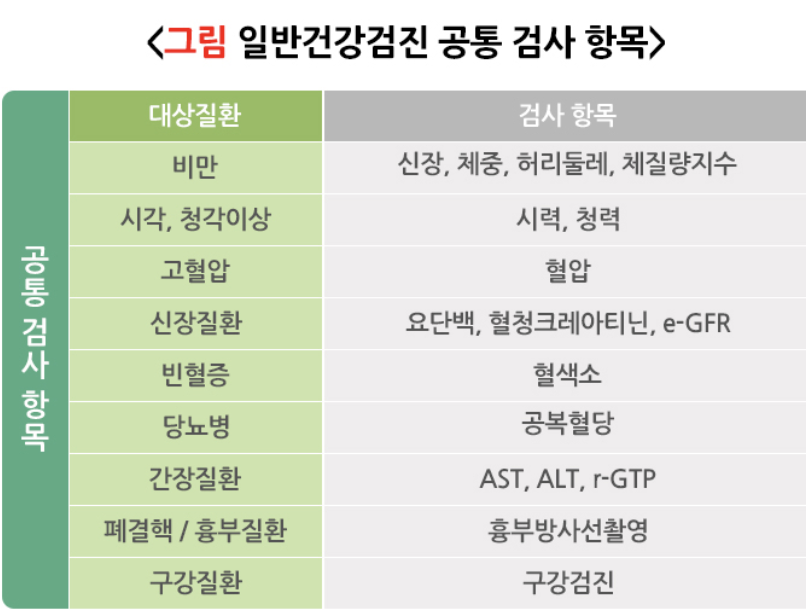

- 대한신장학회 근거
- 사구체여과율 계산식
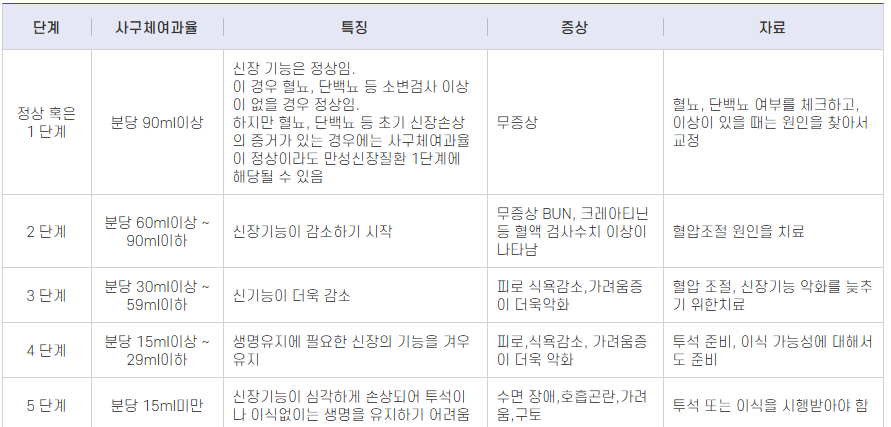


- 질병관리청 근거로 함수 만듦
https://health.kdca.go.kr/healthinfo/biz/health/ntcnInfo/healthSourc/thtimtCntnts/thtimtCntntsView.do?thtimt_cntnts_sn=7

In [10]:
df['성별코드'] = df['성별코드'].map({1:0, 2:1})

# bmi추가
# 파생변수 bmi 생성 :  질병관리청 근거
def bmi_category(bmi):
    if bmi < 18.5:
        return 1 #'저체중'
    elif bmi < 23:
        return 2 #'정상'
    elif bmi < 25:
        return 3 #'비만전단계'
    elif bmi < 30:
        return 4 #'비만1단계'
    elif bmi < 35:
        return 5 #'비만2단계'
    else:
        return 6 #'비만3단계'

df['BMI'] = df['체중(5kg단위)'] / ((df['신장(5cm단위)'] / 100) ** 2)
#df['BMI구분'] = df['BMI'].apply(bmi_category)
#df = df.drop(columns='BMI',axis=1)

# 입력오류 추정 인스턴스 삭제
cond1= df['허리둘레']==999
cond2 = df['청력(좌)']==3.0
cond3 = df['청력(우)']==3.0

# 실명인 사람은 일반적인 상황이 아니므로 제외
cond4= df['시력(좌)']==9.9
cond5= df['시력(우)']==9.9

df = df.drop(index=df[cond1|cond2|cond3|cond4|cond5].index, axis=0).reset_index(drop=True)

# 값이 하나 뚝 떨어져있어서 제외
cond1= df['HDL콜레스테롤']==561
cond2= df['혈청크레아티닌']==25.0
df = df.drop(index=df[cond1|cond2].index, axis=0).reset_index(drop=True)

# 입력오류 제거
df = df[~(cond1|cond2)].reset_index(drop=True)
cond1 = df['치석']==2.0
df = df[~(cond1|cond2)].reset_index(drop=True)

# cols = ['성별코드', '연령대코드(5세단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
#        '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
#        '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
#        '음주여부', '치아우식증유무', '치석', 'BMI']
# df=df[cols]
# df.columns =['성별', '연령대', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
#        '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
#        'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)',
#        '감마지티피', '흡연상태', '음주여부', '치아우식증유무', '치석', 'BMI']

In [11]:
df = df[['성별코드', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', 'BMI']]
df.columns=['성별', '연령대', '키',
       '체중', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', 'BMI']

In [12]:
# 연령대 그룹 코드별 중앙 나이 추정값 매핑
연령대_중앙값 = {
    1: 2, 2: 7, 3: 12, 4: 17, 5: 22,
    6: 27, 7: 32, 8: 37, 9: 42,
    10: 47, 11: 52, 12: 57, 13: 62,
    14: 67, 15: 72, 16: 77, 17: 82, 18: 87
}


def 사구체여과율(row):
    creatinine = row['혈청크레아티닌']
    group_code = row['연령대']

    # 연령대 매핑 확인
    if group_code not in 연령대_중앙값:
        return np.nan  # 알 수 없는 연령대면 NaN

    age = 연령대_중앙값[group_code]
    sex_factor = 0.742 if row['성별'] == 1 else 1  # 여성=1, 남성=0

    # MDRD 공식 계산
    egfr = 186 * (creatinine ** -1.154) * (age ** -0.203) * sex_factor
    return egfr

df['사구체여과율']= df.apply(사구체여과율, axis=1)

# def 신장질환판단(row):
#     gap = row['사구체여과율']
#     if gap>=90: return '정상'
#     elif gap>=60: return '신장기능 감소 시작'
#     elif gap>=30: return '신장기능이 더욱 감소' 
#     elif gap>=15: return '생명만 유지할 수준' 
#     else : return '신장 이식 필요'
# df['신장질환군']=df.apply(신장질환판단, axis=1)
# df['신장질환군'].value_counts()
# # [정상, 신장기능 감소 시작,신장기능이 더욱 감소,생명만 유지할 수준,신장 이식 필요]

# # 신장질환은 사구체여과율, 요단백, 혈청크레아티닌 근거로 함
# # 요단백은  전날 고지방식 육식, 고당질의 음식 등 식이적인 요인과 격렬한 운동, 급격한 스트레스 등으로 인해서도 양성반응을 보일 수 있으므로 제외함
# # 요단백은 변수가 크다고 판단하였음

# def 간질환판단(row):
#     ast = row['혈청지오티(AST)']
#     alt = row['혈청지피티(ALT)']
#     gtp = row['감마지티피']

#     # 간 효소 중 1개라도 정상 범위 초과 시 간기능 이상 의심
#     if ast >= 40 or alt >= 40 or gtp > (63 if row['성별'] == 0 else 35):
#         return 1  # 이상
#     else:
#         return 0  # 정상
        
# df['간질환군']=df.apply(간질환판단, axis=1)
# df['간질환군'].value_counts()

# # 보건소 근거
# # 고혈압 합병증 : 뇌, 신장, 눈, 심

# def 혈압판단(row):
#     수축기 = row['수축기혈압']
#     이완기 = row['이완기혈압']

#     if 수축기 >= 140 or 이완기 >= 90:
#         return '고혈압 의심'
#     elif 수축기 >= 120 or 이완기 >= 80:
#         return '고혈압 전단계'
#     else:
#         return '정상 혈압'

# df['고혈압군'] = df.apply(혈압판단, axis=1)
# df['고혈압군'].value_counts()

# def 빈혈판단(row):
#     hb = row['혈색소']
#     gender = row['성별']

#     if gender == 0:
#         return 0 if 16.5>=hb >= 13 else 1
#     elif gender == 1:
#         return 0 if 15.5>=hb >= 12 else 1
#     else:
#         return '성별 오류'
# df['빈혈군'] = df.apply(빈혈판단, axis=1)
# df['빈혈군'].value_counts()

# def 당뇨판단(row):
#     혈당 = row['식전혈당(공복혈당)']
#     if 혈당>=126: return '당뇨병 의심'
#     if 혈당 >= 100: return '공복혈당장애 의심'
#     else : return '정상혈당'

# df['당뇨군'] = df.apply(당뇨판단, axis=1)
# df['당뇨군'].value_counts()
# #['정상혈당','공복혈당장애 의심','당뇨병 의심']

# def 이상지질혈증판단(row):
#     if (
#         row['총콜레스테롤'] > 250 or
#         row['총콜레스테롤'] < 150 or
#         row['HDL콜레스테롤'] > 65 or
#         row['HDL콜레스테롤'] < 30  or
#         row['트리글리세라이드'] > 135 or
#         row['트리글리세라이드'] < 30 or
#         row['LDL콜레스테롤'] >= 170
#     ):
#         return 1  # 이상지질혈증 의심
#     else:
#         return 0  # 정상

def 청력(l, r):
    if (l==2)&(r==2): return 3 #'양쪽이상'
    elif (l==1)&(r==1): return 1 # '양쪽정상'
    else : return 2 # 한쪽이상
df['청력']= df.apply(lambda row: 청력(row['청력(좌)'], row['청력(우)']), axis=1)
df['청력']

df['평균시력']=round((df['시력(좌)']+df['시력(우)'])/2,1)


# df['이상지질혈증군'] = df.apply(이상지질혈증판단, axis=1)
# df['이상지질혈증군'].value_counts()

new_df = df.copy()
# df = df.drop(columns=['허리둘레','시력(좌)','시력(우)','청력(좌)','청력(우)','사구체여과율',
#  '혈청크레아티닌',
#  '혈청지오티(AST)',
#  '혈청지피티(ALT)',
#  '감마지티피',
#  '수축기혈압',
#  '이완기혈압',
#  '혈색소',
#  '식전혈당(공복혈당)',
#  '총콜레스테롤',
#  'HDL콜레스테롤',
#  '트리글리세라이드',
#  'LDL콜레스테롤'])

In [12]:
org_df = df.copy()

# EDA

- BMI, 허리둘레 0.79 -> BMI 선택, 허리둘레 제거
- 시력(좌) - 시력(우) -> 0.7 -> 평균 시력으로 파생
- 청력(좌/우) 0.583579 -> 청력한쪽 문제, 양쪽문제, 정상으로 바꾸기


- 수축기혈압 - 이완기혈압 -> 0.7 -> 고혈압여부 파생
- 혈청지오티(AST) - 혈청지피티(ALT) -> 0.77 -> 간기능위험군 파생
- 식전혈당
- 총콜레스테롤
**치아 변수...군집의 품질 vs. 도메인적으로 중요한 변수(치아)**  
치아관련 변수인 치아우식증유무, 치석은 다른 변수와 상관성이 낮은 것을 확인  
-> 하지만, 연구 결과, 구강질환이 있는 자는 폐암과 연관있다는 연구결과  
1. 1단계 군집분석은 치아 변수 없이 진행
2. 2단계에서 치아 변수로 군집 해석과 보험 추천을 보완하는 방식

In [13]:
df.dtypes

성별           int64
연령대          int64
요단백        float64
흡연상태       float64
음주여부       float64
치아우식증유무    float64
치석         float64
BMI구분        int64
신장질환군       object
간질환군         int64
고혈압군        object
빈혈군          int64
당뇨군         object
청력           int64
평균시력       float64
이상지질혈증군      int64
dtype: object

In [ ]:
for col in df.columns:
    plt.title(col)
    sns.boxplot(data=df, y=col)
    plt.show()

In [13]:
cat_col = []
for col in df.columns:
    print(col,':',df[col].unique())
    cat_col.append(col)

성별 : [0 1]
연령대 : [13  8  9 17 12 15 11 14  7 10  6 16  5 18]
키 : [160 170 180 165 175 155 150 145 140 185 135 190 130 195]
체중 : [ 70  80  85 105  60  50  65  45  75 100  95  55  40  90 110 120  35 125
 115 130 135  30]
허리둘레 : [ 85.   93.   96.1  91.  104.   83.2  71.   84.   74.   66.   70.   94.8
  81.5  68.   79.5  78.   86.   83.   77.3  73.   81.   92.   76.   98.5
  87.   98.  114.1  96.   86.5  72.   68.2  74.7  90.   60.   65.   94.5
  89.   88.8  83.5  66.7  82.   89.5  93.3  97.3  95.   85.5  79.   80.
  90.4  79.3  80.3  74.5  71.4  84.5  78.4  72.4  94.   75.   59.5  77.
  92.7  78.8  67.   88.1  82.8 104.8  76.5  88.   84.3 108.   70.3  92.1
  78.5  94.2 119.   95.3 101.   96.5  73.5  89.1  91.5 105.   86.3 100.1
  69.   59.   79.8  88.5  99.   80.4  84.4  86.7  97.   68.5  95.5  83.8
  83.3  86.6  74.2  63.2  89.8  83.7  76.8  93.1  74.8  85.2  97.4  87.1
  81.4  72.3  91.4  82.4  78.6 100.   64.  103.4 111.6  78.7  61.   82.1
  76.2 112.4  63.   82.6  79.4  80.9  67.5  67

In [ ]:
for col in cat_col:
    ratio = df[col].value_counts(normalize=True).reset_index()
    ratio.columns = [col, 'ratio']
    
    ax = sns.barplot(data=ratio, x=col, y='ratio')
    plt.title(f'{col} (비율)')
    plt.ylabel('비율')

    # 막대 위에 비율 텍스트 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height,
                f'{height:.2%}', ha='center', va='bottom')
    plt.xticks(rotation=45)

    plt.show()

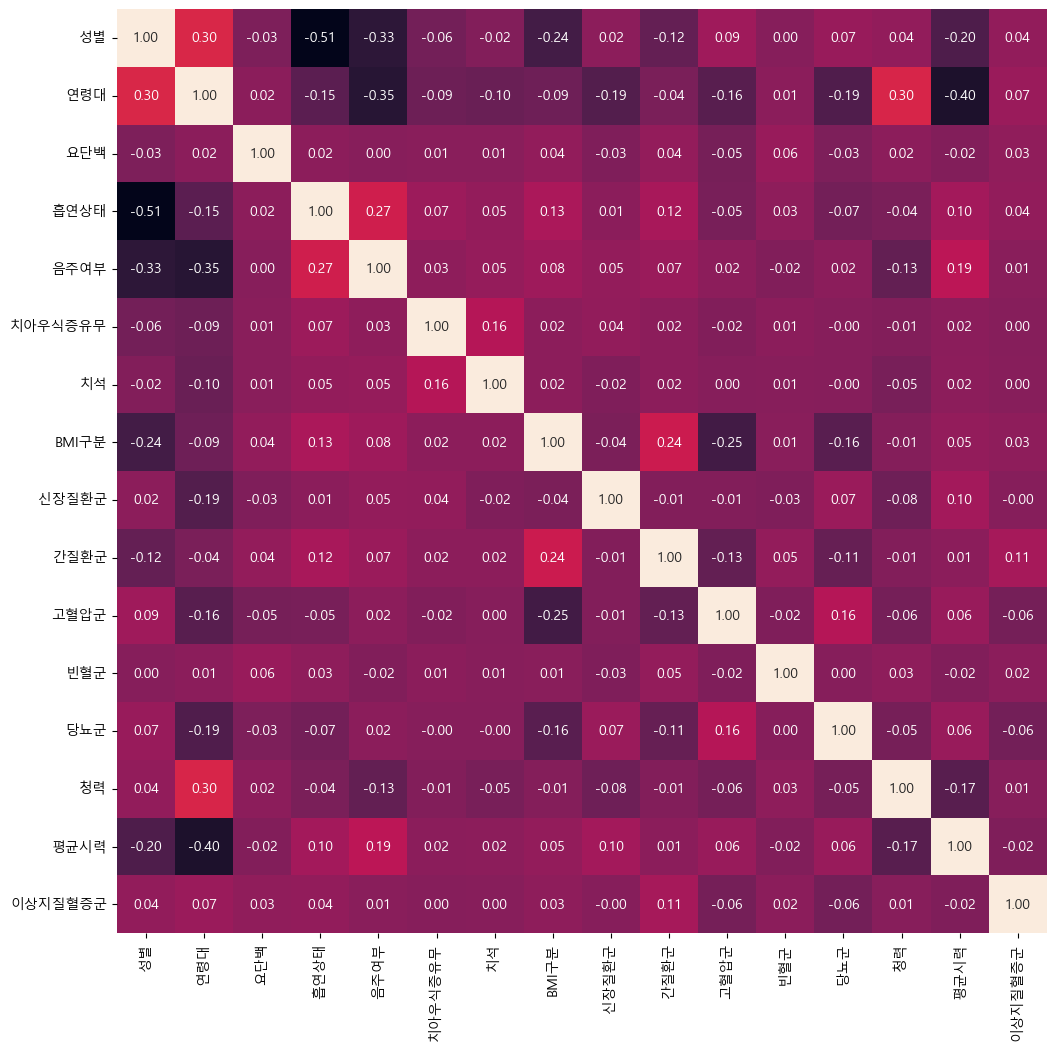

In [56]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), fmt='.2f', annot=True, cbar=False);

# 이진변수 0 1 로-> 스케일링X
성별 : [1 2] - 남자:1, 여자:2 -> 여 0, ㅇ남 1로 변환
음주여부 : [0. 1.] - 안마심:0, 마심:1 
치아우식증유무 : [0. 1.] -없음:0, 있음:1
치석 : [0. 1.]
청력(좌) : [1. 2.]  - 1(정상):0, 2(비정상):1
청력(우) : [1. 2.]  - 1(정상):0, 2(비정상):1

# 오디너리 후 스케일링
요단백 : [1. 2. 3. 4. 5. 6.]
연령대 : [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18]
흡연상태 : [1. 2. 3.]  (비흡연 < 과거흡연 < 현재흡연)
BMI구분 : [1,2,3,4,5,6]
평균청력 

# 수치형으로 그대로 -> 스케일링
키 : [130 135 140 145 150 155 160 165 170 175 180 185 190 195]
시력(좌) : [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.8 2. ]
시력(우) : [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.8 1.9
 2. ]

# 새로운 질병군 피처 추가

# 이진변수 0 1 로-> 스케일링X
성별 : [0 1]
음주여부 : [0. 1.]  
치아우식증유무 : [0. 1.] 
치석 : [0. 1.]
이상지질혈증군 : [1 0]
간질환군 : [0 1]
빈혈군 : [0,1]


# 오디너리 후 스케일링
연령대 : [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18]
흡연상태 : [1. 2. 3.]  (비흡연 < 과거흡연 < 현재흡연)
BMI구분 : [1,2,3,4,5,6]
청력 : [1 3 2]
신장질환군 : ['정상' '신장기능 감소 시작' '신장기능이 더욱 감소' '생명만 유지할 수준' '신장 이식 필요']
고혈압군 : ['정상 혈압' '고혈압 전단계' '고혈압 의심']

당뇨군 : ['정상혈당' '공복혈당장애 의심' '당뇨병 의심']

In [13]:
df=df.drop(columns='요단백') # 요단백은 전날에 먹은 음식 영향 많이 받아서 당뇨 판정에서 제외
df.columns

Index(['성별', '연령대', '키', '체중', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
       'LDL콜레스테롤', '혈색소', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피',
       '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무', '치석', 'BMI', '사구체여과율', '청력',
       '평균시력'],
      dtype='object')

In [14]:
use_cols = ['성별', '연령대', '허리둘레', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부',
       '치아우식증유무', '치석', '청력', '평균시력', '사구체여과율']
df_ord = df[use_cols].copy()

scale_cols=[]
for col in df_ord.columns:
    values = df_ord[col].unique()
    if df[col].nunique() < 20:
        print(col,':',values)
    else:
        scale_cols.append(col)

성별 : [0 1]
연령대 : [13  8  9 17 12 15 11 14  7 10  6 16  5 18]
흡연상태 : [3. 2. 1.]
음주여부 : [1. 0.]
치아우식증유무 : [0. 1.]
치석 : [0. 1.]
청력 : [1 3 2]
평균시력 : [1.1 1.2 0.2 1.  0.6 0.8 0.5 0.7 0.9 1.6 0.4 1.4 1.8 0.3 1.5 0.1 2.  1.3]


In [15]:
use_cols = ['성별', '연령대', '허리둘레', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부',
       '치아우식증유무', '치석','청력', '평균시력', '사구체여과율']
df_ord = df[use_cols].copy()

# 2. 오디너리 인코딩
from sklearn.preprocessing import OrdinalEncoder
# 인코딩할 컬럼 목록
ordinal_cols = ['연령대', '흡연상태', '청력']
# 각 컬럼의 순서 정의
ordinal_categories = [
     [ 5 , 6,  7,  8,  9, 10, 11, 12, 13, 14, 15 ,16, 17, 18],
     [1., 2., 3.],

    [1,2,3]
    # ,[1., 2., 3., 4., 5., 6.]
]

# 인코딩 수행
ord_encoder = OrdinalEncoder(categories=ordinal_categories)
df_ord[ordinal_cols] = ord_encoder.fit_transform(df_ord[ordinal_cols])


# 스케일링할 열 선택
#cols_to_scale = ['연령대', '흡연상태', 'BMI구분', '신장질환군','고혈압군', '당뇨군', '청력', '평균시력']

from sklearn.preprocessing import StandardScaler
# 스케일러 적용
scaler = StandardScaler()
df_ord[scale_cols] = scaler.fit_transform(df_ord[scale_cols])
df_ord.head()

,성별,연령대,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,...,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,치아우식증유무,치석,청력,평균시력,사구체여과율
0,0,8.0,0.234346,-0.471477,-1.148030,-0.137234,-2.623898,0.768624,-0.790058,-2.870528,...,-0.243738,-0.238598,-0.180466,2.0,1.0,0.0,0.0,0.0,1.1,-0.100188
1,0,3.0,1.026132,-0.256433,0.074445,-0.426193,0.302341,-0.115491,-1.485986,0.932976,...,-0.107658,0.452444,-0.180466,1.0,1.0,1.0,0.0,0.0,1.2,-0.535610
2,0,4.0,1.332949,0.603744,1.093174,-0.426193,-0.392021,-0.010596,0.532205,-0.642761,...,-0.107658,1.070745,0.125989,1.0,1.0,0.0,0.0,0.0,0.2,0.776842
3,0,12.0,0.828186,-0.041389,-2.370504,0.055405,-1.929536,-0.849756,0.184241,-1.865316,...,-0.153018,-0.093115,-0.421251,2.0,1.0,0.0,0.0,2.0,1.0,-0.301948
4,0,8.0,2.114838,0.173656,-2.064886,-0.185394,-0.218430,0.468924,-0.372501,-0.262411,...,-0.334458,-0.238598,-0.180466,2.0,1.0,0.0,1.0,0.0,1.2,0.432201


# 범주형으로 K-modes

In [26]:
cont_col = ['허리둘레', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '사구체여과율', '평균시력']

cat_col=['성별', '연령대', '청력', '흡연상태', '음주여부', '치아우식증유무', '치석', 'BMI구분']

In [27]:
df2 = df.copy()
for col in cont_col:
    name = 'cat_' + str(col)
    try:
        df2[name] = pd.qcut(df2[col], q=10, duplicates='drop')  # 분위 중복 제거
    except ValueError as e:
        print(f"'{col}'에서 에러 발생: {e}")
        df2[name] = np.nan
    df2=df2.drop(columns=col)
df2.isna().sum()

성별                0
연령대               0
키                 0
체중                0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
요단백               0
흡연상태              0
음주여부              0
구강검진수검여부          0
치아우식증유무           0
치석                0
BMI               0
청력                0
cat_허리둘레          0
cat_수축기혈압         0
cat_이완기혈압         0
cat_식전혈당(공복혈당)    0
cat_총콜레스테롤        0
cat_트리글리세라이드      0
cat_HDL콜레스테롤      0
cat_LDL콜레스테롤      0
cat_혈색소           0
cat_혈청크레아티닌       0
cat_혈청지오티(AST)    0
cat_혈청지피티(ALT)    0
cat_감마지티피         0
cat_사구체여과율        0
cat_평균시력          0
dtype: int64

In [29]:
df2 = df2[['성별', '연령대', '청력', '흡연상태', '음주여부', '치아우식증유무', '치석', 'cat_허리둘레', 'cat_수축기혈압', 'cat_이완기혈압', 'cat_식전혈당(공복혈당)', 'cat_총콜레스테롤',
       'cat_트리글리세라이드', 'cat_HDL콜레스테롤', 'cat_LDL콜레스테롤', 'cat_혈색소',
       'cat_혈청크레아티닌', 'cat_혈청지오티(AST)', 'cat_혈청지피티(ALT)', 'cat_감마지티피',
       'cat_사구체여과율', 'cat_평균시력']]

df2.isna().sum()

성별                0
연령대               0
청력                0
흡연상태              0
음주여부              0
치아우식증유무           0
치석                0
cat_허리둘레          0
cat_수축기혈압         0
cat_이완기혈압         0
cat_식전혈당(공복혈당)    0
cat_총콜레스테롤        0
cat_트리글리세라이드      0
cat_HDL콜레스테롤      0
cat_LDL콜레스테롤      0
cat_혈색소           0
cat_혈청크레아티닌       0
cat_혈청지오티(AST)    0
cat_혈청지피티(ALT)    0
cat_감마지티피         0
cat_사구체여과율        0
cat_평균시력          0
dtype: int64

In [ ]:
from kmodes.kmodes import KModes
hy=[]
end=10
for i in range(1,end):
    km = KModes(n_clusters=i, init='Huang', random_state=42)
    km.fit(df2)
    hy.append(km.cost_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

# 질병 판단 전 군집분석 한 것 KMeans

In [18]:
new_df=df_ord.dropna().reset_index(drop=True)

In [19]:
new_df.columns

Index(['성별', '연령대', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '혈청크레아티닌', '혈청지오티(AST)',
       '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', '치아우식증유무', '치석', '청력', '평균시력',
       '사구체여과율'],
      dtype='object')

In [20]:
# new_df_ord = new_df.copy()

# # 2. 오디너리 인코딩
# from sklearn.preprocessing import OrdinalEncoder
# # 인코딩할 컬럼 목록
# ordinal_cols = ['연령대', '흡연상태','BMI구분', '청력']
# # 각 컬럼의 순서 정의
# ordinal_categories = [
#      [ 5 , 6,  7,  8,  9, 10, 11, 12, 13, 14, 15 ,16, 17, 18],
#      [1., 2., 3.],
#      [1,2,3,4,5,6],
#     [1,2,3]
# ]

# # 인코딩 수행
# ord_encoder = OrdinalEncoder(categories=ordinal_categories)
# new_df_ord[ordinal_cols] = ord_encoder.fit_transform(new_df_ord[ordinal_cols])


# # 스케일링할 열 선택
# cols_to_scale = ['연령대', '흡연상태', 'BMI구분', '청력']

# from sklearn.preprocessing import StandardScaler
# # 스케일러 적용
# scaler = StandardScaler()
# new_df_ord[cols_to_scale] = scaler.fit_transform(new_df_ord[cols_to_scale])
# new_df_ord.head()

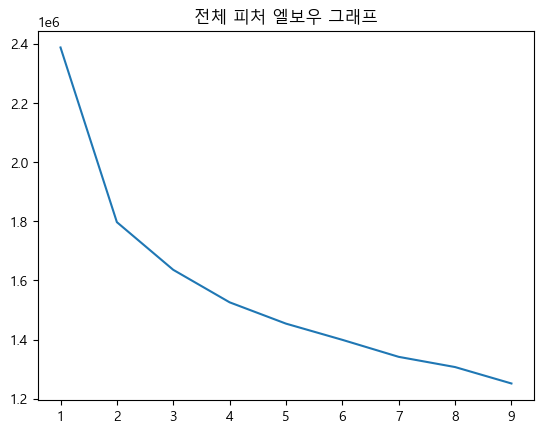

In [23]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

# ▶ 5. KMeans 클러스터링 (클러스터 수는 예시로 3개)
hy=[]
end=10
for i in range(1,end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(df_ord)
    hy.append(m.inertia_)

plt.title('전체 피처 엘보우 그래프')
plt.plot(range(1,end), hy)
plt.show()

In [25]:
from sklearn.metrics import silhouette_score, silhouette_samples
for i in range(2,5):
    m1 = KMeans(i, random_state=42).fit(df_ord)
    print(i,':', silhouette_score(df_ord, m1.labels_))

2 : 0.23143237587796067
3 : 0.1443797736308972



KeyboardInterrupt



## 그냥 K=2 -> 0.44
- 군집1: 간질환, 고혈압 전단계, 공복혈당장애, 이상지질혈증
- 군집2 : 고혈압 전단계

In [176]:
use_col = ['성별', '연령대', '허리둘레',
 '수축기혈압', '이완기혈압'
, '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
'혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
'음주여부', '치아우식증유무', '치석', 'BMI구분', '사구체여과율','청력', '평균시력']

new_df_ord2=new_df_ord[use_col]

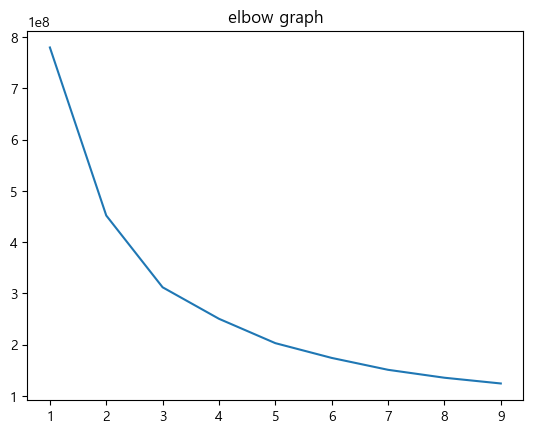

In [179]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

# PCA (2차원으로 줄이기)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df_ord2)

# ▶ 5. KMeans 클러스터링 (클러스터 수는 예시로 3개)
hy=[]
end=10
for i in range(1,end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(X_pca)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [180]:
from sklearn.metrics import silhouette_score, silhouette_samples
for i in range(2, end):
    m1 = KMeans(i, random_state=42).fit(X_pca)
    print(i,':', silhouette_score(X_pca, m1.labels_))

2 : 0.4496066986722985
3 : 0.35791225467920024
4 : 0.35215040341410203
5 : 0.3426247458089424
6 : 0.32473476718956695
7 : 0.3361686858394317


KeyboardInterrupt: 

In [187]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_pca)
new_df_ord2['cluster']=labels
df_cluster = new_df_ord2.groupby("cluster").mean()
df_cluster

,성별,연령대,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,치아우식증유무,치석,BMI구분,사구체여과율,청력,평균시력
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.242272,-0.094441,87.936608,126.303729,78.706736,106.656754,215.120571,212.288901,48.590771,124.506081,...,39.296901,61.895268,0.326256,0.741848,0.164653,0.534446,0.456573,92.979672,-0.038560,0.072117
1,0.454597,0.030926,80.895263,121.357176,74.143598,98.947935,190.811588,89.390386,58.894256,114.089218,...,23.716892,26.517273,-0.106835,0.645735,0.139973,0.502375,-0.149509,93.495846,0.012627,-0.023615


In [188]:
def cluster_신장질환판단(row):
    gap = row['사구체여과율']
    if gap>=90: return '정상'
    elif gap>=60: return '신장기능 감소 시작'
    elif gap>=30: return '신장기능이 더욱 감소' 
    elif gap>=15: return '생명만 유지할 수준' 
    else : return '신장 이식 필요'

def cluster_간질환판단(row):
    ast = row['혈청지오티(AST)']
    alt = row['혈청지피티(ALT)']
    gtp = row['감마지티피']

    # 간 효소 중 1개라도 정상 범위 초과 시 간기능 이상 의심
    if ast >= 40 or alt >= 40 or gtp > (63 if row['성별'] == 0 else 35):
        return 1  # 이상
    else:
        return 0  # 정상

def cluster_혈압판단(row):
    수축기 = row['수축기혈압']
    이완기 = row['이완기혈압']

    if 수축기 >= 140 or 이완기 >= 90:
        return '고혈압 의심'
    elif 수축기 >= 120 or 이완기 >= 80:
        return '고혈압 전단계'
    else:
        return '정상 혈압'

def cluster_당뇨판단(row):
    혈당 = row['식전혈당(공복혈당)']
    if 혈당>=126: return '당뇨병 의심'
    if 혈당 >= 100: return '공복혈당장애 의심'
    else : return '정상혈당'

def cluster_이상지질혈증판단(row):
    if (
        row['총콜레스테롤'] > 250 or
        row['총콜레스테롤'] < 150 or
        row['HDL콜레스테롤'] > 65 or
        row['HDL콜레스테롤'] < 30  or
        row['트리글리세라이드'] > 135 or
        row['트리글리세라이드'] < 30 or
        row['LDL콜레스테롤'] >= 170
    ):
        return 1  # 이상지질혈증 의심
    else:
        return 0  # 정상

In [192]:
# 진단 결과를 새로운 컬럼으로 추가
print('신장질환',df_cluster.apply(cluster_신장질환판단, axis=1))
print('\n간질환판단', df_cluster.apply(cluster_간질환판단, axis=1))
print('\n혈압판단', df_cluster.apply(cluster_혈압판단, axis=1))
print('\n당뇨판단', df_cluster.apply(cluster_당뇨판단, axis=1))
print('\n이상지질혈증판단',df_cluster.apply(cluster_이상지질혈증판단, axis=1))

신장질환 cluster
0    정상
1    정상
dtype: object

간질환판단 cluster
0    1
1    0
dtype: int64

혈압판단 cluster
0    고혈압 전단계
1    고혈압 전단계
dtype: object

당뇨판단 cluster
0    공복혈당장애 의심
1         정상혈당
dtype: object

이상지질혈증판단 cluster
0    1
1    0
dtype: int64


# 0.7이상 상관성 갖는 변수 제거-> k=2 0.56
- 공통 : 신장 정상, 고혈압 전단계
- 군집1: 간질환, 공복혈당장애 의심, 이상지질혈증
- 군집2: 고혈압 전단계 외 모두 정상 -> 건강

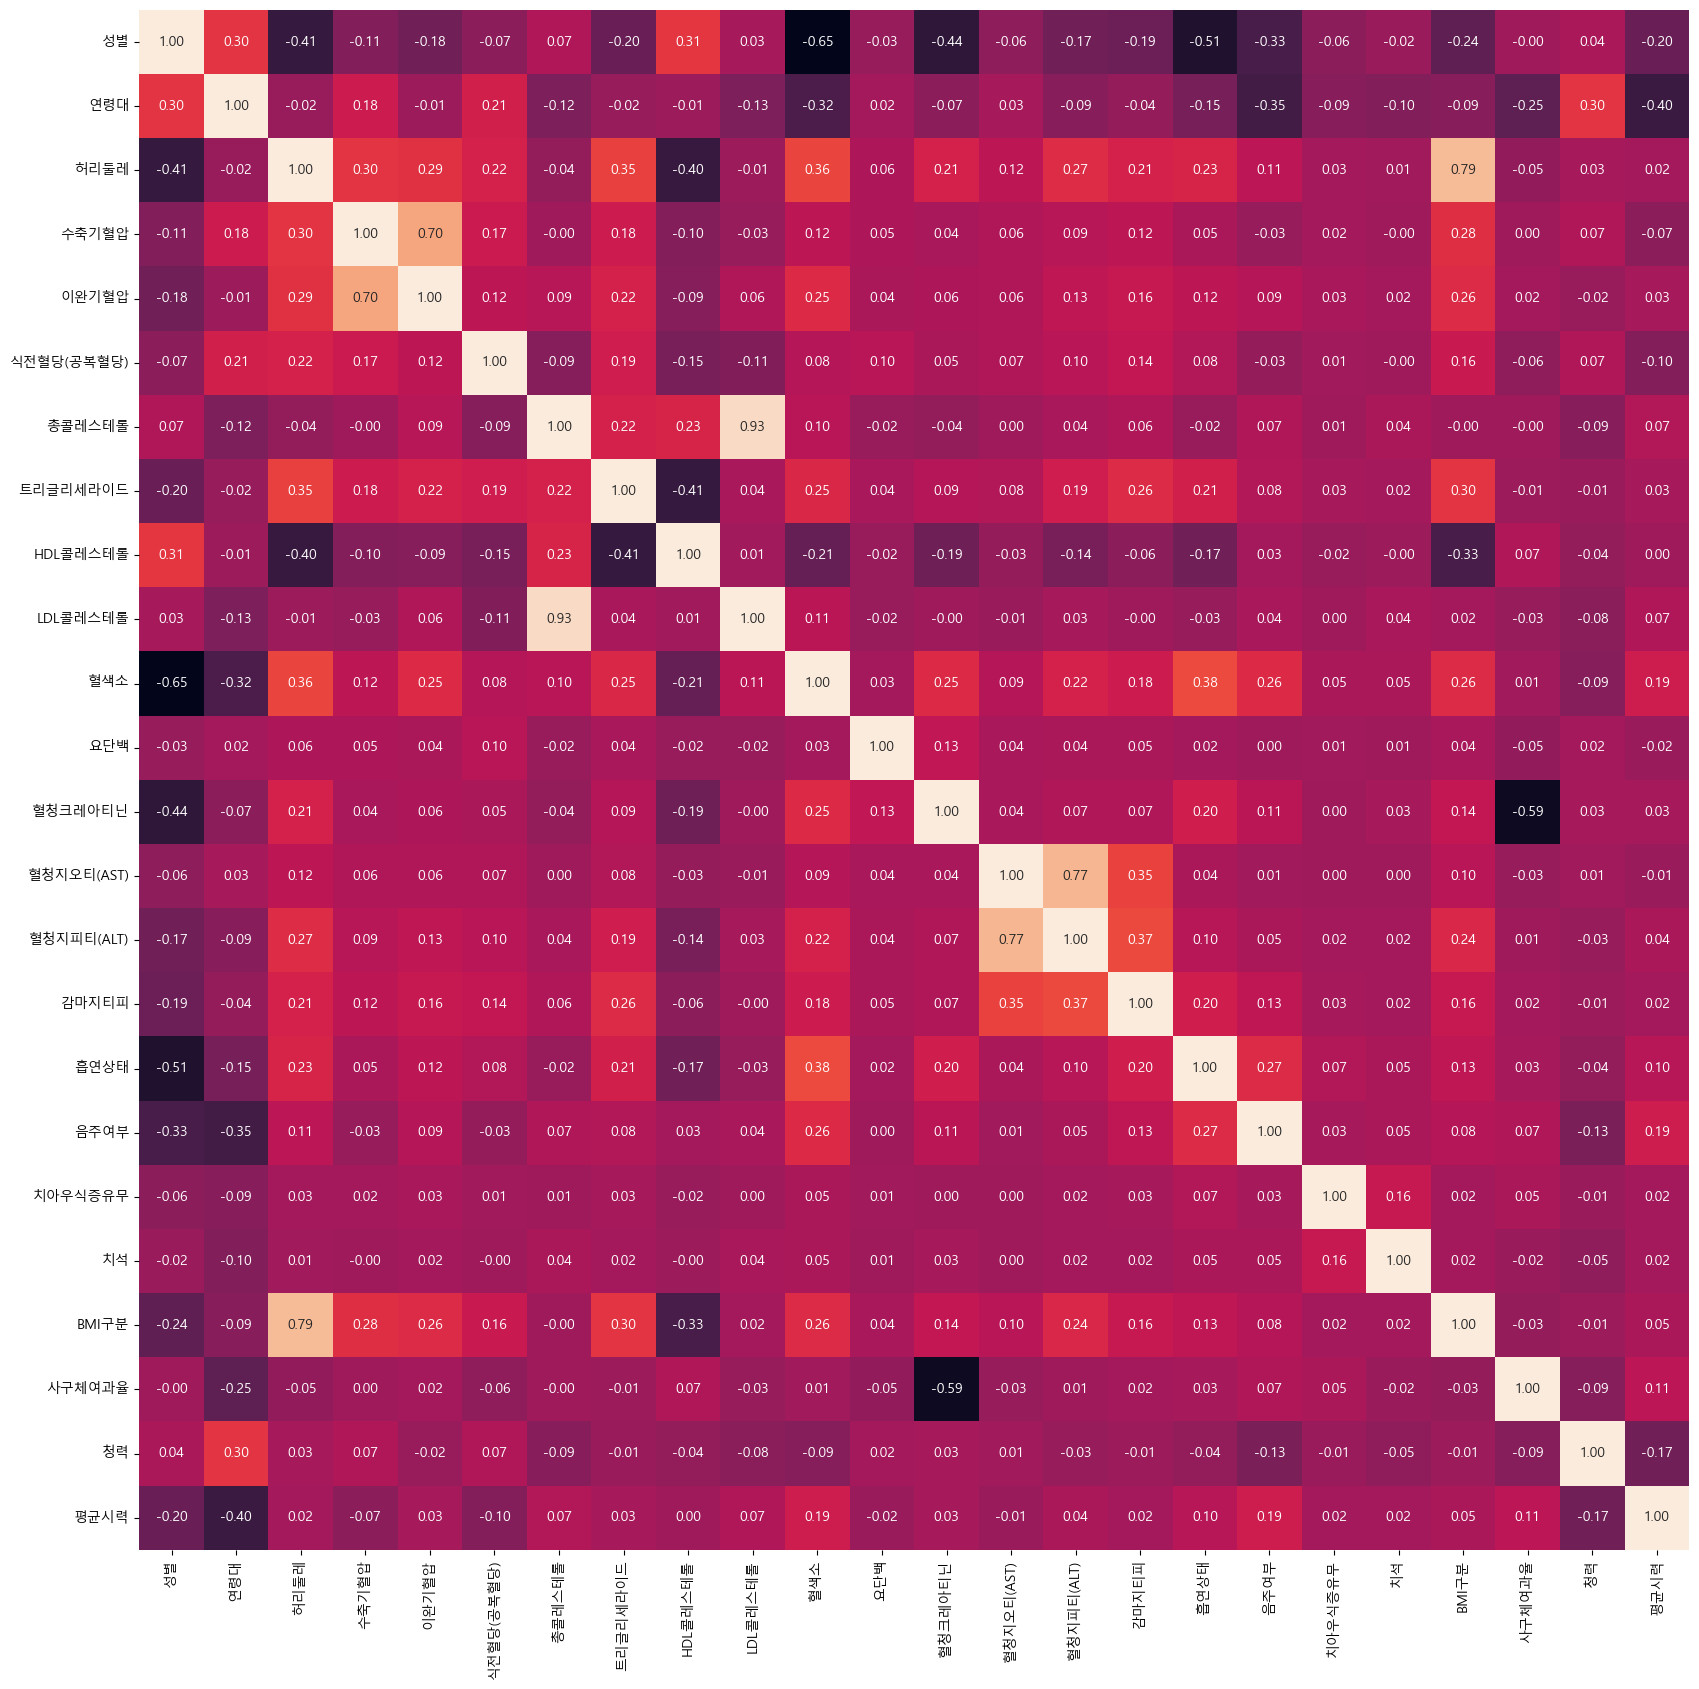

In [198]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_ord2.corr(), fmt='.2f',cbar=False, annot=True);

In [18]:
use_col = ['성별', '연령대'
           #',허리둘레' BMI상관성이 0.79로 매우 높아 조금 더 개인을 잘 설명하는 BMI 선
, '수축기혈압'
#, '이완기혈압' 수축기와 0.7여서 이완기 거거
, '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤'
#, 'LDL콜레스테롤' 총콜레스테롤이랑 0.93으로 상관성이 너무 강해 제거, 총콜레스테롤이 다른 변수와 LDL보다 더 상관성있음
,'혈색소',  '혈청크레아티닌'
           #, '혈청지오티(AST)'
           , '혈청지피티(ALT)', '감마지티피', '흡연상태',
'음주여부', '치아우식증유무', '치석', '사구체여과율','청력', '평균시력']

new_df_ord2= df_ord[use_col]

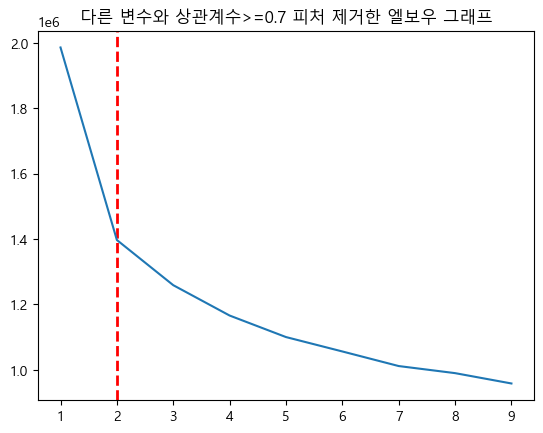

In [30]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

# ▶ 5. KMeans 클러스터링 (클러스터 수는 예시로 3개)
hy=[]
end=10
for i in range(1,end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(new_df_ord2)
    hy.append(m.inertia_)

plt.title('다른 변수와 상관계수>=0.7 피처 제거한 엘보우 그래프')
plt.axvline(x=2, color='r', linestyle='--', linewidth=2)
plt.plot(range(1,end), hy)
plt.show()

In [32]:
from sklearn.metrics import silhouette_score, silhouette_samples
for i in range(2, end):
    m1 = KMeans(i, random_state=42).fit(new_df_ord2)
    print(i,':', silhouette_score(X_pca, m1.labels_)) 

2 : 0.45721720789689185



KeyboardInterrupt



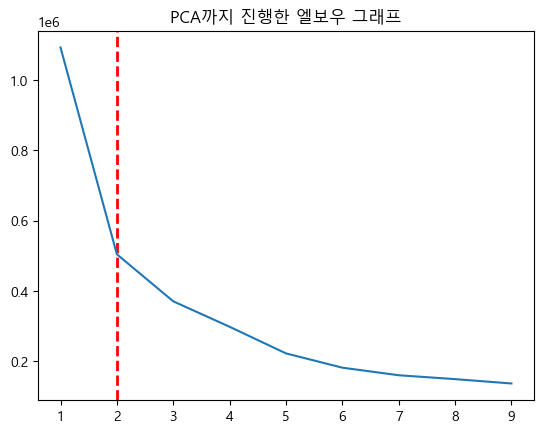

In [31]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

# PCA (2차원으로 줄이기)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df_ord2)

# ▶ 5. KMeans 클러스터링 (클러스터 수는 예시로 3개)
hy=[]
end=10
for i in range(1,end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(X_pca)
    hy.append(m.inertia_)

plt.title('PCA까지 진행한 엘보우 그래프')
plt.axvline(x=2, color='r', linestyle='--', linewidth=2)
plt.plot(range(1,end), hy)
plt.show()

In [202]:
from sklearn.metrics import silhouette_score, silhouette_samples
for i in range(2, end):
    m1 = KMeans(i, random_state=42).fit(X_pca)
    print(i,':', silhouette_score(X_pca, m1.labels_)) 

2 : 0.5617181398220815
3 : 0.45577934247166735
4 : 0.4628668789417347
5 : 0.39825052872333894
6 : 0.4138189391948672
7 : 0.3726118973047309
8 : 0.3808958339293026
9 : 0.39101302141852157


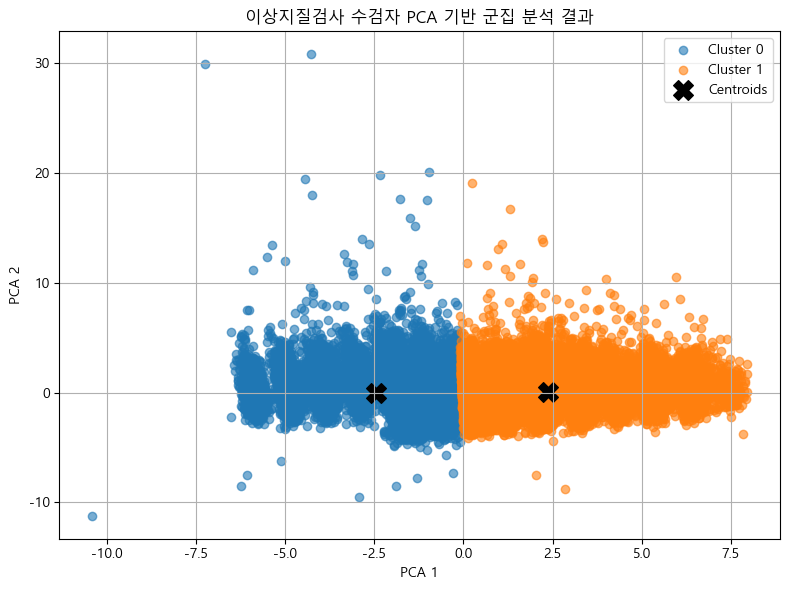

In [35]:
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['axes.unicode_minus'] = False  # 음수 기호(−)가 깨지지 않도록 설정

# ▶ KMeans 클러스터링
k = 2  # 클러스터 수를 2로 정확히 맞춤
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

# ▶ 결과 시각화
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}', alpha=0.6)

# ▶ 클러스터 중심 (centroids) 표시
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.title('이상지질검사 수검자 PCA 기반 군집 분석 결과')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
df

,성별,연령대,키,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,BMI,사구체여과율,청력,평균시력
0,0,13,160,70,85.0,1.0,1.2,1.0,1.0,116.0,...,27.0,3.0,1.0,1,0.0,0.0,27.343750,90.878589,1,1.1
1,0,8,170,80,93.0,1.2,1.2,1.0,1.0,119.0,...,27.0,2.0,1.0,1,1.0,0.0,27.681661,80.057281,1,1.2
2,0,9,180,85,96.1,0.1,0.2,1.0,1.0,131.0,...,41.0,2.0,1.0,1,0.0,0.0,26.234568,112.674981,1,0.2
3,0,17,165,70,91.0,1.0,0.9,2.0,2.0,122.0,...,16.0,3.0,1.0,1,0.0,0.0,25.711662,85.864348,3,1.0
4,0,13,175,105,104.0,1.2,1.2,1.0,1.0,125.0,...,27.0,3.0,1.0,1,0.0,1.0,34.285714,104.109794,1,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100323,0,5,175,60,68.0,1.5,1.5,1.0,1.0,103.0,...,14.0,1.0,1.0,1,0.0,0.0,19.591837,88.968031,1,1.5
100324,1,11,160,55,81.5,1.2,0.6,1.0,1.0,118.0,...,27.0,2.0,1.0,1,0.0,1.0,21.484375,93.395302,1,0.9
100325,1,16,155,65,92.0,1.0,0.9,1.0,1.0,137.0,...,30.0,1.0,0.0,1,0.0,0.0,27.055151,127.159218,1,1.0
100326,1,10,150,75,94.0,0.9,0.9,1.0,1.0,130.0,...,16.0,1.0,1.0,1,0.0,0.0,33.333333,113.892320,1,0.9


In [231]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_pca)
new_df_ord2['cluster']=labels
df_cluster = new_df_ord2.groupby("cluster").mean()
df_cluster

,성별,연령대,수축기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지피티(ALT),감마지티피,흡연상태,음주여부,치아우식증유무,치석,BMI구분,사구체여과율,청력,평균시력
cluster,,,,,,,,,,,,,,,,,,,,
0,0.244712,-0.086416,126.188312,106.690004,213.444109,213.633644,48.521782,14.937178,1.152451,0.913236,38.654998,61.141082,0.325057,0.739680,0.164514,0.533070,0.449206,92.979138,-0.035354,0.068045
1,0.453219,0.027980,121.408252,98.958530,191.421750,89.295518,58.888044,14.133451,1.110794,0.862958,23.967898,26.859491,-0.105247,0.646703,0.140086,0.502909,-0.145444,93.494589,0.011447,-0.022032


# 이상지질검사 수검자 군집결과 저장

In [40]:
os.getcwd()

'C:\\Users\\samsung\\Desktop\\ml_team\\data\\test'

In [41]:
df['cluster']=labels
df.to_csv('이상지질검사수검자군집결과마지막결과.csv')

In [218]:
def cluster_신장질환판단(row):
    gap = row['사구체여과율']
    if gap>=90: return '정상'
    elif gap>=60: return '신장기능 감소 시작'
    elif gap>=30: return '신장기능이 더욱 감소' 
    elif gap>=15: return '생명만 유지할 수준' 
    else : return '신장 이식 필요'

def cluster_간질환판단(row):
    alt = row['혈청지피티(ALT)']
    gtp = row['감마지티피']

    # 간 효소 중 1개라도 정상 범위 초과 시 간기능 이상 의심
    if  alt >= 40 or gtp > (63 if row['성별'] == 0 else 35):
        return 1  # 이상
    else:
        return 0  # 정상

def cluster_혈압판단(row):
    수축기 = row['수축기혈압']
    #이완기 = row['이완기혈압']

    if 수축기 >= 140 :
        return '고혈압 의심'
    elif 수축기 >= 120:
        return '고혈압 전단계'
    else:
        return '정상 혈압'

def cluster_당뇨판단(row):
    혈당 = row['식전혈당(공복혈당)']
    if 혈당>=126: return '당뇨병 의심'
    if 혈당 >= 100: return '공복혈당장애 의심'
    else : return '정상혈당'

def cluster_이상지질혈증판단(row):
    if (
        row['총콜레스테롤'] > 250 or
        row['총콜레스테롤'] < 150 or
        row['HDL콜레스테롤'] > 65 or
        row['HDL콜레스테롤'] < 30  or
        row['트리글리세라이드'] > 135 or
        row['트리글리세라이드'] < 30
    ):
        return 1  # 이상지질혈증 의심
    else:
        return 0  # 정상

In [210]:
# 진단 결과를 새로운 컬럼으로 추가
print('신장질환',df_cluster.apply(cluster_신장질환판단, axis=1))
print('\n간질환판단', df_cluster.apply(cluster_간질환판단, axis=1))
print('\n혈압판단', df_cluster.apply(cluster_혈압판단, axis=1))
print('\n당뇨판단', df_cluster.apply(cluster_당뇨판단, axis=1))
print('\n이상지질혈증판단',df_cluster.apply(cluster_이상지질혈증판단, axis=1))

신장질환 cluster
0    정상
1    정상
dtype: object

간질환판단 cluster
0    1
1    0
dtype: int64

혈압판단 cluster
0    고혈압 전단계
1    고혈압 전단계
dtype: object

당뇨판단 cluster
0    공복혈당장애 의심
1         정상혈당
dtype: object

이상지질혈증판단 cluster
0    1
1    0
dtype: int64


# 주성분분석 없이 위 과정

In [106]:
new_df.columns

Index(['성별', '연령대', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '혈청크레아티닌', '혈청지오티(AST)',
       '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', '치아우식증유무', '치석', 'BMI구분', '청력',
       '평균시력', '사구체여과율'],
      dtype='object')

In [109]:
use_col = ['성별', '연령대'
           #',허리둘레' BMI상관성이 0.79로 매우 높아 조금 더 개인을 잘 설명하는 BMI 선
, '수축기혈압'
#, '이완기혈압' 수축기와 0.7여서 이완기 거거
, '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤'
#, 'LDL콜레스테롤' 총콜레스테롤이랑 0.93으로 상관성이 너무 강해 제거, 총콜레스테롤이 다른 변수와 LDL보다 더 상관성있음
,'혈색소'
           #, '요단백'
           , '혈청크레아티닌'
           #, '혈청지오티(AST)'
           , '혈청지피티(ALT)', '감마지티피', '흡연상태',
'음주여부', '치아우식증유무', '치석', 'BMI구분', '사구체여과율','청력', '평균시력']

new_df_ord2=new_df[use_col]

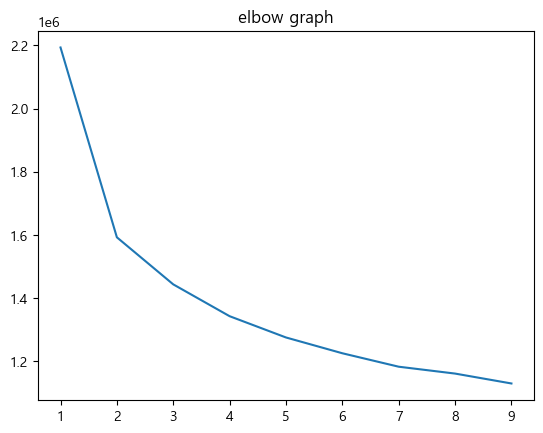

In [112]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

# PCA (2차원으로 줄이기)
# ▶ 5. KMeans 클러스터링 (클러스터 수는 예시로 3개)
hy=[]
end=10
for i in range(1,end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(new_df_ord2)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [113]:
from sklearn.metrics import silhouette_score, silhouette_samples
for i in range(2, 5):
    m1 = KMeans(i, random_state=42).fit(new_df_ord2)
    print(i,':', silhouette_score(new_df_ord2, m1.labels_)) 

2 : 0.24553683121232098



KeyboardInterrupt



In [231]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_pca)
new_df_ord2['cluster']=labels
df_cluster = new_df_ord2.groupby("cluster").mean()
df_cluster

,성별,연령대,수축기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지피티(ALT),감마지티피,흡연상태,음주여부,치아우식증유무,치석,BMI구분,사구체여과율,청력,평균시력
cluster,,,,,,,,,,,,,,,,,,,,
0,0.244712,-0.086416,126.188312,106.690004,213.444109,213.633644,48.521782,14.937178,1.152451,0.913236,38.654998,61.141082,0.325057,0.739680,0.164514,0.533070,0.449206,92.979138,-0.035354,0.068045
1,0.453219,0.027980,121.408252,98.958530,191.421750,89.295518,58.888044,14.133451,1.110794,0.862958,23.967898,26.859491,-0.105247,0.646703,0.140086,0.502909,-0.145444,93.494589,0.011447,-0.022032


In [218]:
def cluster_신장질환판단(row):
    gap = row['사구체여과율']
    if gap>=90: return '정상'
    elif gap>=60: return '신장기능 감소 시작'
    elif gap>=30: return '신장기능이 더욱 감소' 
    elif gap>=15: return '생명만 유지할 수준' 
    else : return '신장 이식 필요'

def cluster_간질환판단(row):
    alt = row['혈청지피티(ALT)']
    gtp = row['감마지티피']

    # 간 효소 중 1개라도 정상 범위 초과 시 간기능 이상 의심
    if  alt >= 40 or gtp > (63 if row['성별'] == 0 else 35):
        return 1  # 이상
    else:
        return 0  # 정상

def cluster_혈압판단(row):
    수축기 = row['수축기혈압']
    #이완기 = row['이완기혈압']

    if 수축기 >= 140 :
        return '고혈압 의심'
    elif 수축기 >= 120:
        return '고혈압 전단계'
    else:
        return '정상 혈압'

def cluster_당뇨판단(row):
    혈당 = row['식전혈당(공복혈당)']
    if 혈당>=126: return '당뇨병 의심'
    if 혈당 >= 100: return '공복혈당장애 의심'
    else : return '정상혈당'

def cluster_이상지질혈증판단(row):
    if (
        row['총콜레스테롤'] > 250 or
        row['총콜레스테롤'] < 150 or
        row['HDL콜레스테롤'] > 65 or
        row['HDL콜레스테롤'] < 30  or
        row['트리글리세라이드'] > 135 or
        row['트리글리세라이드'] < 30
    ):
        return 1  # 이상지질혈증 의심
    else:
        return 0  # 정상

In [210]:
# 진단 결과를 새로운 컬럼으로 추가
print('신장질환',df_cluster.apply(cluster_신장질환판단, axis=1))
print('\n간질환판단', df_cluster.apply(cluster_간질환판단, axis=1))
print('\n혈압판단', df_cluster.apply(cluster_혈압판단, axis=1))
print('\n당뇨판단', df_cluster.apply(cluster_당뇨판단, axis=1))
print('\n이상지질혈증판단',df_cluster.apply(cluster_이상지질혈증판단, axis=1))

신장질환 cluster
0    정상
1    정상
dtype: object

간질환판단 cluster
0    1
1    0
dtype: int64

혈압판단 cluster
0    고혈압 전단계
1    고혈압 전단계
dtype: object

당뇨판단 cluster
0    공복혈당장애 의심
1         정상혈당
dtype: object

이상지질혈증판단 cluster
0    1
1    0
dtype: int64


# 추가로 성능 올리기 위한 작업

In [221]:
# 변수 중요도 기반 피처 제거
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X = new_df_ord2.copy()
base_score = silhouette_score(X, KMeans(n_clusters=2, random_state=42).fit_predict(X))

for col in X.columns:
    X_tmp = X.drop(columns=[col])
    labels = KMeans(n_clusters=2, random_state=42).fit_predict(X_tmp)
    score = silhouette_score(X_tmp, labels)
    print(f"{col} 제거 → 실루엣 계수: {score:.4f} (변화량: {score - base_score:+.4f})")

성별 제거 → 실루엣 계수: 0.4023 (변화량: -0.0000)
연령대 제거 → 실루엣 계수: 0.4024 (변화량: +0.0001)
수축기혈압 제거 → 실루엣 계수: 0.4110 (변화량: +0.0087)
식전혈당(공복혈당) 제거 → 실루엣 계수: 0.4121 (변화량: +0.0098)
총콜레스테롤 제거 → 실루엣 계수: 0.4641 (변화량: +0.0618)
트리글리세라이드 제거 → 실루엣 계수: 0.2402 (변화량: -0.1621)
HDL콜레스테롤 제거 → 실루엣 계수: 0.4106 (변화량: +0.0083)
혈색소 제거 → 실루엣 계수: 0.4024 (변화량: +0.0001)
요단백 제거 → 실루엣 계수: 0.4024 (변화량: +0.0000)
혈청크레아티닌 제거 → 실루엣 계수: 0.4023 (변화량: +0.0000)
혈청지피티(ALT) 제거 → 실루엣 계수: 0.4079 (변화량: +0.0056)
감마지티피 제거 → 실루엣 계수: 0.4059 (변화량: +0.0036)
흡연상태 제거 → 실루엣 계수: 0.4024 (변화량: +0.0001)
음주여부 제거 → 실루엣 계수: 0.4024 (변화량: +0.0000)
치아우식증유무 제거 → 실루엣 계수: 0.4024 (변화량: +0.0000)
치석 제거 → 실루엣 계수: 0.4024 (변화량: +0.0000)
BMI구분 제거 → 실루엣 계수: 0.4024 (변화량: +0.0000)
사구체여과율 제거 → 실루엣 계수: 0.4243 (변화량: +0.0219)
청력 제거 → 실루엣 계수: 0.4024 (변화량: +0.0001)
평균시력 제거 → 실루엣 계수: 0.4024 (변화량: +0.0001)


# -> 총콜레스테롤 제거... -> 0.57

In [226]:
use_col = ['성별', '연령대'
           #',허리둘레' BMI상관성이 0.79로 매우 높아 조금 더 개인을 잘 설명하는 BMI 선
, '수축기혈압'
#, '이완기혈압' 수축기와 0.7여서 이완기 거거
, '식전혈당(공복혈당)'
           #, '총콜레스테롤'
           , '트리글리세라이드', 'HDL콜레스테롤'
#, 'LDL콜레스테롤' 총콜레스테롤이랑 0.93으로 상관성이 너무 강해 제거, 총콜레스테롤이 다른 변수와 LDL보다 더 상관성있음
,'혈색소', '요단백', '혈청크레아티닌'
           #, '혈청지오티(AST)'
           , '혈청지피티(ALT)', '감마지티피', '흡연상태',
'음주여부', '치아우식증유무', '치석', 'BMI구분'
           , '사구체여과율'
           ,'청력', '평균시력']

new_df_ord2=new_df_ord[use_col]

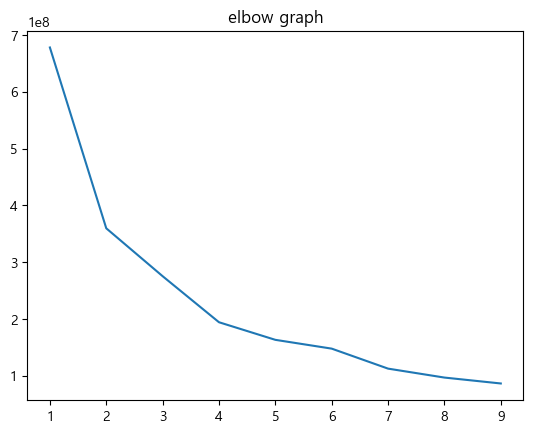

In [227]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

# PCA (2차원으로 줄이기)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df_ord2)

# ▶ 5. KMeans 클러스터링 (클러스터 수는 예시로 3개)
hy=[]
end=10
for i in range(1,end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(X_pca)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [228]:
from sklearn.metrics import silhouette_score, silhouette_samples
for i in range(2, end):
    m1 = KMeans(i, random_state=42).fit(X_pca)
    print(i,':', silhouette_score(X_pca, m1.labels_)) 

2 : 0.5708627695834838
3 : 0.4679404453041519
4 : 0.4747044098323595
5 : 0.4160538059259002
6 : 0.3694774610489151
7 : 0.3870834794442581


KeyboardInterrupt: 

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_pca)
new_df_ord2['cluster']=labels
df_cluster = new_df_ord2.groupby("cluster").mean()
df_cluster

In [ ]:
def cluster_신장질환판단(row):
    gap = row['사구체여과율']
    if gap>=90: return '정상'
    elif gap>=60: return '신장기능 감소 시작'
    elif gap>=30: return '신장기능이 더욱 감소' 
    elif gap>=15: return '생명만 유지할 수준' 
    else : return '신장 이식 필요'

def cluster_간질환판단(row):
    alt = row['혈청지피티(ALT)']
    gtp = row['감마지티피']

    # 간 효소 중 1개라도 정상 범위 초과 시 간기능 이상 의심
    if  alt >= 40 or gtp > (63 if row['성별'] == 0 else 35):
        return 1  # 이상
    else:
        return 0  # 정상

def cluster_혈압판단(row):
    수축기 = row['수축기혈압']
    #이완기 = row['이완기혈압']

    if 수축기 >= 140 :
        return '고혈압 의심'
    elif 수축기 >= 120:
        return '고혈압 전단계'
    else:
        return '정상 혈압'

def cluster_당뇨판단(row):
    혈당 = row['식전혈당(공복혈당)']
    if 혈당>=126: return '당뇨병 의심'
    if 혈당 >= 100: return '공복혈당장애 의심'
    else : return '정상혈당'

def cluster_이상지질혈증판단(row):
    if (
        #row['총콜레스테롤'] > 250 or
        row['총콜레스테롤'] < 150 or
        row['HDL콜레스테롤'] > 65 or
        row['HDL콜레스테롤'] < 30  or
        row['트리글리세라이드'] > 135 or
        row['트리글리세라이드'] < 30
    ):
        return 1  # 이상지질혈증 의심
    else:
        return 0  # 정상

In [ ]:
# 진단 결과를 새로운 컬럼으로 추가
print('신장질환',df_cluster.apply(cluster_신장질환판단, axis=1))
print('\n간질환판단', df_cluster.apply(cluster_간질환판단, axis=1))
print('\n혈압판단', df_cluster.apply(cluster_혈압판단, axis=1))
print('\n당뇨판단', df_cluster.apply(cluster_당뇨판단, axis=1))
print('\n이상지질혈증판단',df_cluster.apply(cluster_이상지질혈증판단, axis=1))

# 질병 판단 후 군집분석 한 것

# 그냥 -> 실루엣계수 0.13

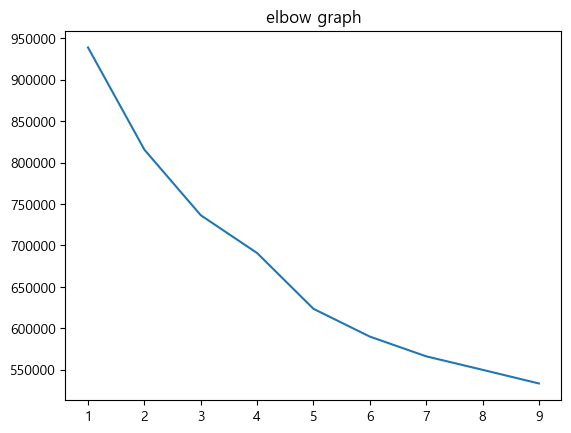

In [62]:
from sklearn.cluster import KMeans
# ▶ 5. KMeans 클러스터링 (클러스터 수는 예시로 3개)
hy=[]
end=10
for i in range(1,end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(df_ord)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
for i in range(2, end):
    m1 = KMeans(i, random_state=42).fit(df_ord)
    print(i,':', silhouette_score(df_ord, m1.labels_))

# 주성분2차원후 -> 군집3, 실루엣계수 0.36

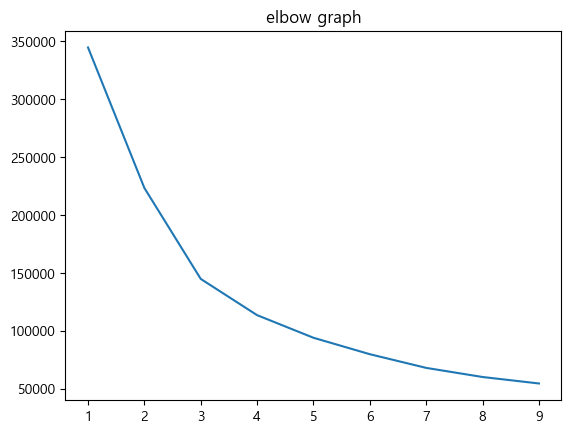

In [64]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

# PCA (2차원으로 줄이기)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_ord)

# ▶ 5. KMeans 클러스터링 (클러스터 수는 예시로 3개)
hy=[]
end=10
for i in range(1,end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(X_pca)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
for i in range(2, end):
    m1 = KMeans(i, random_state=42).fit(X_pca)
    print(i,':', silhouette_score(X_pca, m1.labels_))

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50)
plt.title("K=3 PCA 기반 클러스터링")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
df_ord["cluster"] = labels
df_ord.groupby("cluster").mean()

In [ ]:
for col in [
    '성별', '음주여부', '치아우식증유무', '치석',
    '신장질환군', '간질환군', '고혈압군', '빈혈군', '당뇨군', '이상지질혈증군'
]:
    display(pd.crosstab(df_ord['cluster'], df_ord[col], normalize='index'))

|Cluster | 성별 | 음주 | 간질환 | 고혈압 | 당뇨 | 고지혈증 | 구강위생|
:-- | :-- | :-- | :-- | :-- | :-- | :-- |:--|
0 | 거의 남성 | 많이 함 | 간질환 多 | 중간 | 중간 | 많음 | 보통
1 | 여성 많음 | 적게 함 | 간질환 적음 | 고혈압 多 | 당뇨 多 | 적음 | 구강 건강 좋음
2 | 여성 많음 | 중간 | 간질환 거의 없음 | 고혈압 거의 없음 | 당뇨 거의 없음 | 많음 | 보통


- 다시 한 번 정리
Cluster | 특성 요약
|:--|:--|
0 | 남성 중심, 음주율↑, 간질환 비율↑, 고지혈증↑
1 | 여성 다수, 고혈압·당뇨 위험↑, 구강 건강↑
2 | 여성 다수, 전반적으로 질환 리스크 ↓, 고지혈증↑

In [ ]:
df_cluster = df_ord.copy()
df_cluster['cluster']= df_ord['cluster'].copy()
df_cluster.corr()['cluster']

# 상관계수 0.1 미만인 빈혈군만 제거 -> 군집3, 실루엣계수 0.36

In [71]:
df_ord2 = df_ord.copy()
use_cols=['성별', '연령대', '흡연상태', '음주여부', '치아우식증유무', '치석', 'BMI구분', '신장질환군', '간질환군',
       '고혈압군', '당뇨군', '청력', '평균시력', '이상지질혈증군']
df_ord2=df_ord[use_cols]
df_ord2.head()

,성별,연령대,흡연상태,음주여부,치아우식증유무,치석,BMI구분,신장질환군,간질환군,고혈압군,당뇨군,청력,평균시력,이상지질혈증군
0,0,0.779803,1.814061,1.0,0.0,0.0,0.910181,-0.883625,0,-1.072761,-0.753411,-0.247818,0.584417,1
1,0,-0.975338,0.539204,1.0,1.0,0.0,0.910181,0.843178,1,-1.072761,-0.753411,-0.247818,0.916969,0
2,0,-0.624309,0.539204,1.0,0.0,0.0,0.910181,-0.883625,1,0.435457,-0.753411,-0.247818,-2.408557,0
3,0,2.183916,1.814061,1.0,0.0,0.0,0.910181,0.843178,0,0.435457,0.842287,5.096785,0.251864,1
4,0,0.779803,1.814061,1.0,0.0,1.0,1.839745,-0.883625,0,0.435457,-0.753411,-0.247818,0.916969,1


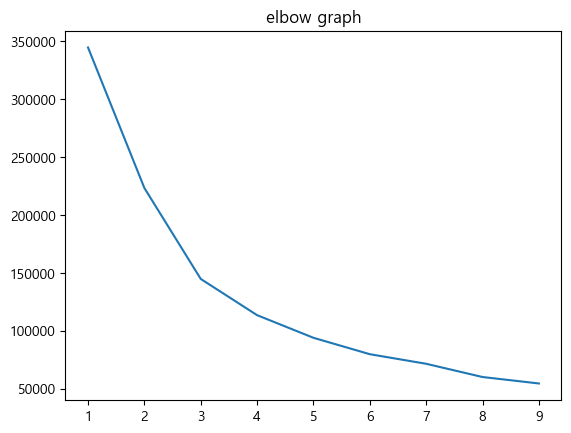

In [72]:
from sklearn.cluster import KMeans

# PCA (2차원으로 줄이기)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_ord2)

# ▶ 5. KMeans 클러스터링 (클러스터 수는 예시로 3개)
hy=[]
end=10
for i in range(1,end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(X_pca)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [73]:
from sklearn.metrics import silhouette_score, silhouette_samples
end=5
for i in range(2, end):
    m1 = KMeans(i, random_state=42).fit(X_pca)
    print(i,':', silhouette_score(X_pca, m1.labels_))

2 : 0.33528482770837004
3 : 0.36042953515473636
4 : 0.3399260488218878


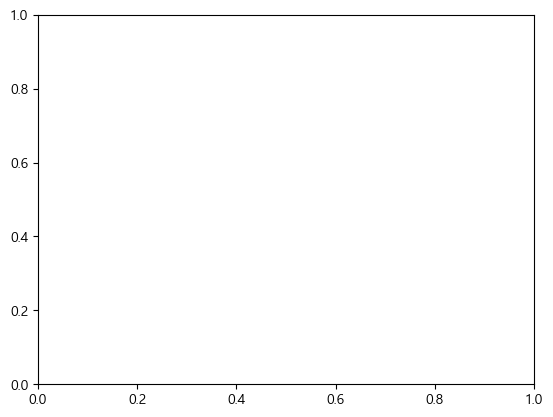

In [75]:
# 실루엣 계수 시각화
def c_s(k,x_f):
    km=KMeans(n_clusters=k,random_state=10)
    py=km.fit_predict(x_f)
    s_v=silhouette_samples(x_f,py)

    y_ax_lo=0
    y_ax_up=0
    y_t=[]

    for i in range(k):
        c_s_v=s_v[py==i]
        c_s_v.sort()
        y_ax_up += len(c_s_v)
        plt.barh(range(y_ax_lo,y_ax_up),c_s_v,height=1)
        y_t.append((y_ax_lo+y_ax_up)/2.)
        y_ax_lo += len(c_s_v)
    s_mean=np.mean(s_v)
    plt.axvline(s_mean,color='r',linestyle='--')
    plt.yticks(y_t,range(k))
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.title(f'k_m:{k}\ns_sc:{round(s_mean,3)}')
    plt.show()

c_s(3, df_ord2)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50)
plt.title("K=3 PCA 기반 클러스터링")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
df_ord2["cluster"] = labels
df_ord2.groupby("cluster").mean()

In [ ]:
for col in [
    '성별', '음주여부',
    '신장질환군', '간질환군', '고혈압군', '당뇨군', '이상지질혈증군'
]:
    display(pd.crosstab(df_ord2['cluster'], df_ord2[col], normalize='index'))

# 치아우식증유무, 치석 제거 -> 군집3, 실루엣계수 0.36

In [77]:
df_ord2 = df_ord.copy()
use_cols=['성별', '연령대', '흡연상태', '음주여부'
          #, '치아우식증유무', '치석'
          , 'BMI구분', '신장질환군', '간질환군',
           '고혈압군', '빈혈군', '당뇨군', '청력', '평균시력', '이상지질혈증군']
df_ord2=df_ord[use_cols]
df_ord2.head()

,성별,연령대,흡연상태,음주여부,BMI구분,신장질환군,간질환군,고혈압군,빈혈군,당뇨군,청력,평균시력,이상지질혈증군
0,0,0.779803,1.814061,1.0,0.910181,-0.883625,0,-1.072761,0,-0.753411,-0.247818,0.584417,1
1,0,-0.975338,0.539204,1.0,0.910181,0.843178,1,-1.072761,1,-0.753411,-0.247818,0.916969,0
2,0,-0.624309,0.539204,1.0,0.910181,-0.883625,1,0.435457,1,-0.753411,-0.247818,-2.408557,0
3,0,2.183916,1.814061,1.0,0.910181,0.843178,0,0.435457,0,0.842287,5.096785,0.251864,1
4,0,0.779803,1.814061,1.0,1.839745,-0.883625,0,0.435457,0,-0.753411,-0.247818,0.916969,1


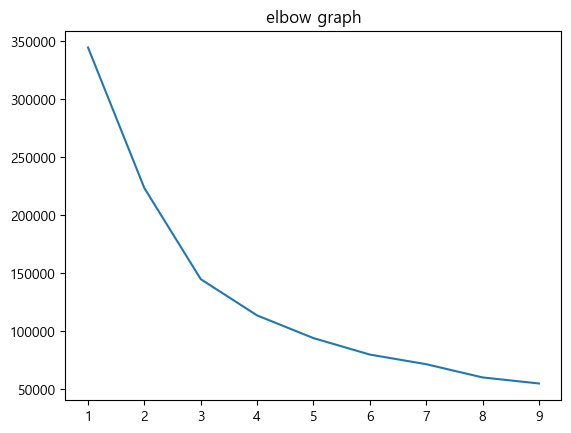

In [81]:
from sklearn.cluster import KMeans

# PCA (2차원으로 줄이기)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_ord2)

# ▶ 5. KMeans 클러스터링 (클러스터 수는 예시로 3개)
hy=[]
end=10
for i in range(1,end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(X_pca)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [82]:
from sklearn.metrics import silhouette_score, silhouette_samples
end=5
for i in range(2, end):
    m1 = KMeans(i, random_state=42).fit(X_pca)
    print(i,':', silhouette_score(X_pca, m1.labels_))

2 : 0.33508288461340846
3 : 0.3603450160468655


In [ ]:
m1 = KMeans(4, random_state=42).fit(X_pca)
print(i,':', silhouette_score(X_pca, m1.labels_))

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50)
plt.title("K=3 PCA 기반 클러스터링")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
df_ord2["cluster"] = labels
df_ord2.groupby("cluster").mean()

In [ ]:
for col in [
    '성별', '음주여부',
    '신장질환군', '간질환군', '고혈압군', '당뇨군', '이상지질혈증군'
]:
    display(pd.crosstab(df_ord2['cluster'], df_ord2[col], normalize='index'))

# 치아우식증유무, 치석, 음주, 흡연 제거 -> 군집3, 실루엣계수 0.358

In [149]:
df_ord2 = df_ord.copy()
use_cols=['성별', '연령대'
          #, '흡연상태', '음주여부'
          #, '치아우식증유무', '치석'
          , 'BMI구분', '신장질환군', '간질환군',
           '고혈압군', '빈혈군', '당뇨군', '청력', '평균시력', '이상지질혈증군']
df_ord2=df_ord[use_cols]
df_ord2.head()

,성별,연령대,BMI구분,신장질환군,간질환군,고혈압군,빈혈군,당뇨군,청력,평균시력,이상지질혈증군
0,0,0.779803,0.910181,-0.883625,0,-1.072761,0,-0.753411,-0.247818,0.584417,1
1,0,-0.975338,0.910181,0.843178,1,-1.072761,1,-0.753411,-0.247818,0.916969,0
2,0,-0.624309,0.910181,-0.883625,1,0.435457,1,-0.753411,-0.247818,-2.408557,0
3,0,2.183916,0.910181,0.843178,0,0.435457,0,0.842287,5.096785,0.251864,1
4,0,0.779803,1.839745,-0.883625,0,0.435457,0,-0.753411,-0.247818,0.916969,1


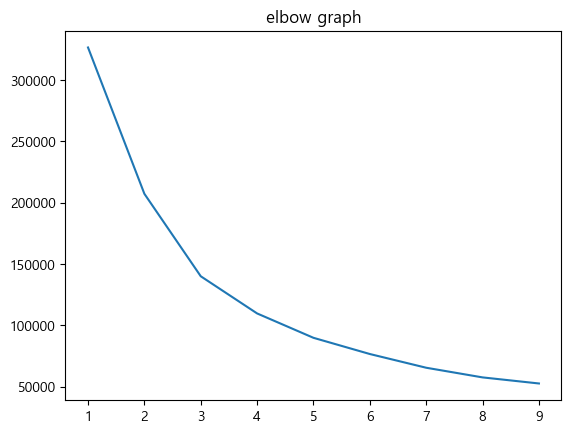

In [150]:
from sklearn.cluster import KMeans

# PCA (2차원으로 줄이기)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_ord2)

# ▶ 5. KMeans 클러스터링 (클러스터 수는 예시로 3개)
hy=[]
end=10
for i in range(1,end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(X_pca)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [151]:
from sklearn.metrics import silhouette_score, silhouette_samples
end=10
for i in range(2, end):
    m1 = KMeans(i, random_state=42).fit(X_pca)
    print(i,':', silhouette_score(X_pca, m1.labels_))

2 : 0.34866467765268994
3 : 0.3585837130542816
4 : 0.33457594440387567
5 : 0.3289243186749701
6 : 0.32803816779410144
7 : 0.3385669839258423
8 : 0.33486911428518173



KeyboardInterrupt



In [ ]:
# 실루엣 계수 시각화
def c_s(k,x_f):
    km=KMeans(n_clusters=k,random_state=10)
    py=km.fit_predict(x_f)
    s_v=silhouette_samples(x_f,py)

    y_ax_lo=0
    y_ax_up=0
    y_t=[]

    for i in range(k):
        c_s_v=s_v[py==i]
        c_s_v.sort()
        y_ax_up += len(c_s_v)
        plt.barh(range(y_ax_lo,y_ax_up),c_s_v,height=1)
        y_t.append((y_ax_lo+y_ax_up)/2.)
        y_ax_lo += len(c_s_v)
    s_mean=np.mean(s_v)
    plt.axvline(s_mean,color='r',linestyle='--')
    plt.yticks(y_t,range(k))
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.title(f'k_m:{k}\ns_sc:{round(s_mean,3)}')
    plt.show()

c_s(2, X_s),c_s(3, X_s), c_s(4, X_s)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50)
plt.title("K=3 PCA 기반 클러스터링")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
df_ord2["cluster"] = labels
df_ord2.groupby("cluster").mean()

In [ ]:
df_ord2['cluster'] = labels
for col in df.columns[:-1]:
    print(df_ord2.groupby('cluster')[col].value_counts(normalize=True), "\n")

In [ ]:
for col in [
    '성별', '음주여부',
    '신장질환군', '간질환군', '고혈압군', '당뇨군', '이상지질혈증군'
]:
    display(pd.crosstab(df_ord2['cluster'], df_ord2[col], normalize='index'))

# K-Modes

In [94]:
for col in df.columns:
    print(col, df[col].unique())

성별 [0 1]
연령대 [13  8  9 17 12 15 11 14  7 10  6 16  5 18]
흡연상태 [3. 2. 1.]
음주여부 [1. 0.]
치아우식증유무 [0. 1.]
치석 [0. 1.]
BMI구분 [4 5 3 2 1 6]
신장질환군 ['정상' '신장기능 감소 시작' '신장기능이 더욱 감소' '생명만 유지할 수준' '신장 이식 필요']
간질환군 [0 1]
고혈압군 ['정상 혈압' '고혈압 전단계' '고혈압 의심']
빈혈군 [0 1]
당뇨군 ['정상혈당' '공복혈당장애 의심' '당뇨병 의심']
청력 [1 3 2]
평균시력 [1.1 1.2 0.2 1.  0.6 0.8 0.5 0.7 0.9 1.6 0.4 1.4 1.8 0.3 1.5 0.1 2.  1.3]
이상지질혈증군 [1 0]


In [ ]:
df_str = df.copy()
# . 오디너리 인코딩
from sklearn.preprocessing import OrdinalEncoder
# 인코딩할 컬럼 목록
ordinal_cols = ['신장질환군','고혈압군','당뇨군']
# 각 컬럼의 순서 정의
ordinal_categories = [
    [
    '정상',
    '신장기능 감소 시작',
    '신장기능이 더욱 감소',
    '생명만 유지할 수준',
    '신장 이식 필요'],
    [
    '정상 혈압',
    '고혈압 전단계',
    '고혈압 의심'
],
     [
    '정상혈당',
    '공복혈당장애 의심',
    '당뇨병 의심'
]
]

# 인코딩 수행
ord_encoder = OrdinalEncoder(categories=ordinal_categories)
df_str[ordinal_cols] = ord_encoder.fit_transform(df_str[ordinal_cols])

In [103]:
# 1. 매핑 딕셔너리 정의
mapping_dict = {
    '성별': {'0': '0', '1': '1'},
    '연령대': {
        '5': '05', '6': '06', '7': '07', '8': '08', '9': '09',
        '10': '10', '11': '11', '12': '12', '13': '13', '14': '14',
        '15': '15', '16': '16', '17': '17', '18': '18'
    },
    '흡연상태': {'1.0': '1', '2.0': '2', '3.0': '3'},
    '음주여부': {'0.0': '0', '1.0': '1'},
    '치아우식증유무': {'0.0': '0', '1.0': '1'},
    '치석': {'0.0': '0', '1.0': '1'},
    'BMI구분': {'1': '1', '2': '2', '3': '3', '4': '4', '5': '5', '6': '6'},
    '신장질환군': {'0.0':'0', '1.0':'1', '2.0':'2', '3.0':'3', '4.0':'4'},
    '간질환군': {'0': '0', '1': '1'},
    '고혈압군': {'0.0': '0', '1.0': '1', '2.0': '2'},
    '빈혈군': {'0': '0', '1': '1'},
    '당뇨군':  {'0.0': '0', '1.0': '1', '2.0': '2'},
    '청력': {'1': '1', '2': '2', '3': '3'},
    '평균시력': {
        '0.1': '0.1', '0.2': '0.2', '0.3': '0.3', '0.4': '0.4',
        '0.5': '0.5', '0.6': '0.6', '0.7': '0.7', '0.8': '0.8',
        '0.9': '0.9', '1.0': '1.0', '1.1': '1.1', '1.2': '1.2',
        '1.3': '1.3', '1.4': '1.4', '1.5': '1.5', '1.6': '1.6',
        '1.8': '1.8', '2.0': '2.0'
    },
    '이상지질혈증군': {'0': '0', '1': '1'}
}

# 2. 매핑 적용
for col, mapping in mapping_dict.items():
    df_str[col] = df_str[col].map(mapping)

In [104]:
# df_str = df_str.astype(int)
# df_str = df_str.astype(str)
for col in df_str.columns:
    print(col, df_str[col].unique())

성별 ['0' '1']
연령대 ['13' '08' '09' '17' '12' '15' '11' '14' '07' '10' '06' '16' '05' '18']
흡연상태 ['3' '2' '1']
음주여부 ['1' '0']
치아우식증유무 ['0' '1']
치석 ['0' '1']
BMI구분 ['4' '5' '3' '2' '1' '6']
신장질환군 ['0' '1' '2' '3' '4']
간질환군 ['0' '1']
고혈압군 ['0' '1' '2']
빈혈군 ['0' '1']
당뇨군 ['0' '1' '2']
청력 ['1' '3' '2']
평균시력 ['1.1' '1.2' '0.2' '1.0' '0.6' '0.8' '0.5' '0.7' '0.9' '1.6' '0.4' '1.4'
 '1.8' '0.3' '1.5' '0.1' '2.0' '1.3']
이상지질혈증군 ['1' '0']


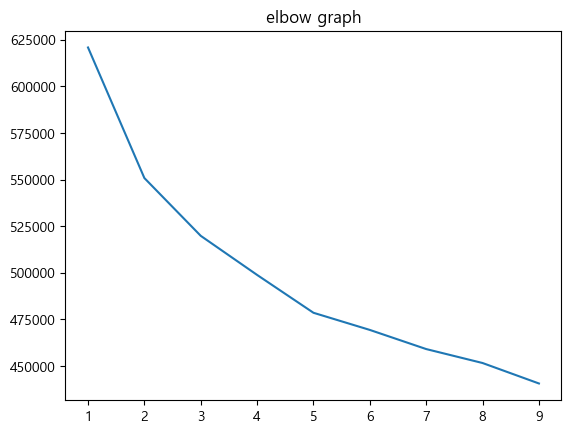

In [108]:
from kmodes.kmodes import KModes
hy=[]
end=10
for i in range(1,end):
    km = KModes(n_clusters=i, init='Huang', random_state=42)
    km.fit(df_str)
    hy.append(km.cost_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [112]:
df_str.dtypes

성별         object
연령대        object
흡연상태       object
음주여부       object
치아우식증유무    object
치석         object
BMI구분      object
신장질환군      object
간질환군       object
고혈압군       object
빈혈군        object
당뇨군        object
청력         object
평균시력       object
이상지질혈증군    object
dtype: object

# MCA + KMeans -> 0.4174

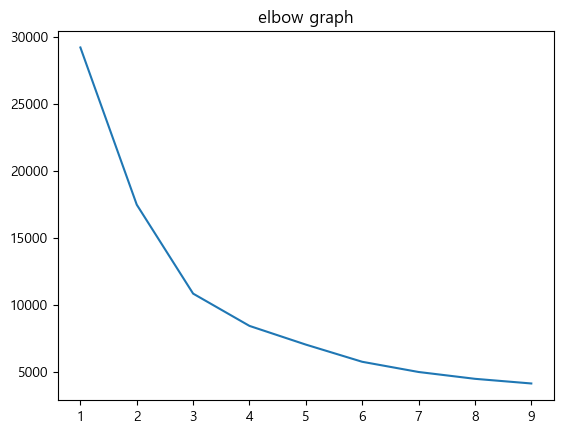

In [115]:
# 1. 설치 (처음 한 번만)
# pip install prince

from prince import MCA
from sklearn.cluster import KMeans

# 2. 모든 컬럼을 문자열로 변환 (MCA는 범주형 처리 필수)
# 3. MCA 차원 축소 (예: 2차원)
mca = MCA(n_components=2, random_state=42)
X_mca = mca.fit_transform(df_str)

# 4. KMeans 군집 적용
end=10
hy=[]
for i in range(1, end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(X_mca)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [116]:
from sklearn.metrics import silhouette_score

# 클러스터 수별 실루엣 점수 비교
for i in range(2, end):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_mca)
    score = silhouette_score(X_mca, labels)
    print(f"군집 수 {i} → 실루엣 점수: {score:.4f}")

군집 수 2 → 실루엣 점수: 0.3902
군집 수 3 → 실루엣 점수: 0.4174
군집 수 4 → 실루엣 점수: 0.3661
군집 수 5 → 실루엣 점수: 0.3595
군집 수 6 → 실루엣 점수: 0.3497
군집 수 7 → 실루엣 점수: 0.3581
군집 수 8 → 실루엣 점수: 0.3407
군집 수 9 → 실루엣 점수: 0.3306


# MCA + KMeans 빈혈군 제외 -> 0.4166

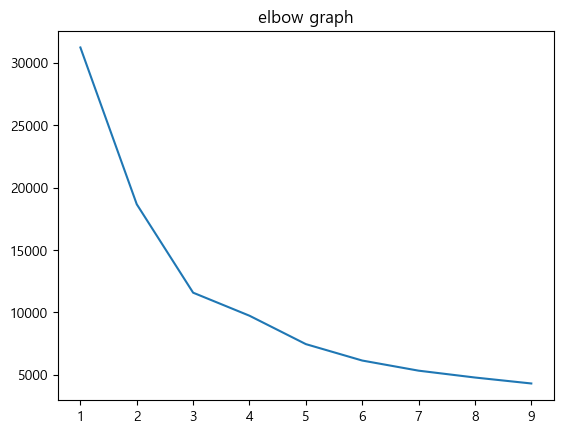

In [127]:
use_cols = set(df_str.columns) - {'빈혈군'}

# 1. 설치 (처음 한 번만)
# pip install prince

from prince import MCA
from sklearn.cluster import KMeans

# 2. 모든 컬럼을 문자열로 변환 (MCA는 범주형 처리 필수)
# 3. MCA 차원 축소 (예: 2차원)
mca = MCA(n_components=2, random_state=42)
X_mca = mca.fit_transform(df_str[list(use_cols)])

# 4. KMeans 군집 적용
end=10
hy=[]
for i in range(1, end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(X_mca)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [128]:
from sklearn.metrics import silhouette_score

# 클러스터 수별 실루엣 점수 비교
for i in range(2, end):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_mca)
    score = silhouette_score(X_mca, labels)
    print(f"군집 수 {i} → 실루엣 점수: {score:.4f}")

군집 수 2 → 실루엣 점수: 0.3903
군집 수 3 → 실루엣 점수: 0.4166
군집 수 4 → 실루엣 점수: 0.3566
군집 수 5 → 실루엣 점수: 0.3500
군집 수 6 → 실루엣 점수: 0.3496
군집 수 7 → 실루엣 점수: 0.3570
군집 수 8 → 실루엣 점수: 0.3404
군집 수 9 → 실루엣 점수: 0.3270


# MCA + KMeans 빈혈, 치아변수 제외 -> 0.4177

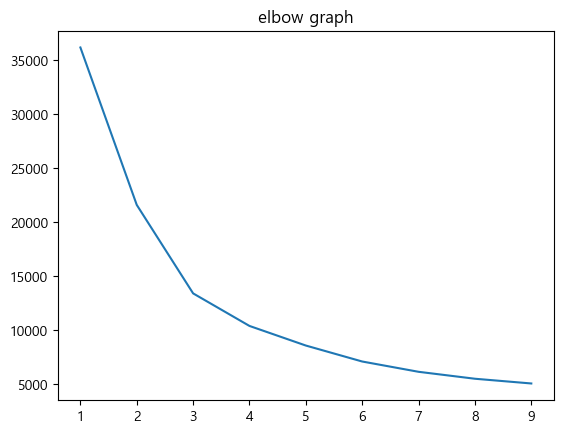

In [129]:
use_cols = set(df_str.columns) - {'빈혈군','치석','치아우식증유무'}

# 1. 설치 (처음 한 번만)
# pip install prince

from prince import MCA
from sklearn.cluster import KMeans

# 2. 모든 컬럼을 문자열로 변환 (MCA는 범주형 처리 필수)
# 3. MCA 차원 축소 (예: 2차원)
mca = MCA(n_components=2, random_state=42)
X_mca = mca.fit_transform(df_str[list(use_cols)])

# 4. KMeans 군집 적용
end=10
hy=[]
for i in range(1, end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(X_mca)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [130]:
from sklearn.metrics import silhouette_score

# 클러스터 수별 실루엣 점수 비교
for i in range(2, end):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_mca)
    score = silhouette_score(X_mca, labels)
    print(f"군집 수 {i} → 실루엣 점수: {score:.4f}")

군집 수 2 → 실루엣 점수: 0.3917
군집 수 3 → 실루엣 점수: 0.4177
군집 수 4 → 실루엣 점수: 0.3678
군집 수 5 → 실루엣 점수: 0.3521
군집 수 6 → 실루엣 점수: 0.3498
군집 수 7 → 실루엣 점수: 0.3592
군집 수 8 → 실루엣 점수: 0.3454
군집 수 9 → 실루엣 점수: 0.3316


# MCA + KMeans 빈혈, 치아변수, 음주, 흡연 제외 -> 0.39 (오히려 저해)

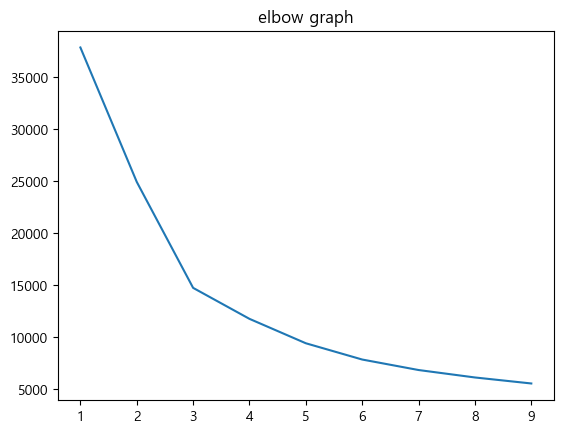

In [131]:
use_cols = set(df_str.columns) - {'빈혈군','치석','치아우식증유무','음주여부','흡연상태'}

# 1. 설치 (처음 한 번만)
# pip install prince

from prince import MCA
from sklearn.cluster import KMeans

# 2. 모든 컬럼을 문자열로 변환 (MCA는 범주형 처리 필수)
# 3. MCA 차원 축소 (예: 2차원)
mca = MCA(n_components=2, random_state=42)
X_mca = mca.fit_transform(df_str[list(use_cols)])

# 4. KMeans 군집 적용
end=10
hy=[]
for i in range(1, end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(X_mca)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [132]:
from sklearn.metrics import silhouette_score

# 클러스터 수별 실루엣 점수 비교
for i in range(2, end):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_mca)
    score = silhouette_score(X_mca, labels)
    print(f"군집 수 {i} → 실루엣 점수: {score:.4f}")

군집 수 2 → 실루엣 점수: 0.3342
군집 수 3 → 실루엣 점수: 0.3907
군집 수 4 → 실루엣 점수: 0.3460
군집 수 5 → 실루엣 점수: 0.3533
군집 수 6 → 실루엣 점수: 0.3513
군집 수 7 → 실루엣 점수: 0.3527
군집 수 8 → 실루엣 점수: 0.3391
군집 수 9 → 실루엣 점수: 0.3264


# MCA+KMeans 질병만 -> 0.4396

In [146]:
df_str.columns

Index(['성별', '연령대', '흡연상태', '음주여부', '치아우식증유무', '치석', 'BMI구분', '신장질환군', '간질환군',
       '고혈압군', '빈혈군', '당뇨군', '청력', '평균시력', '이상지질혈증군'],
      dtype='object')

In [139]:
use_cols = set(df_str.columns) - {'성별', '연령대', '흡연상태', '음주여부', '치아우식증유무', '치석', 'BMI구분', '청력', '평균시력'}

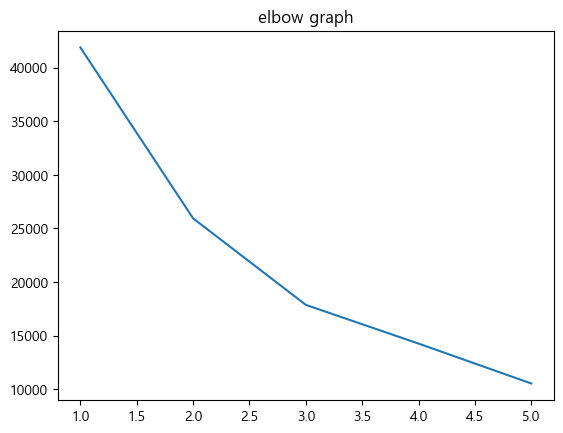

In [145]:
from prince import MCA
from sklearn.cluster import KMeans

# 2. 모든 컬럼을 문자열로 변환 (MCA는 범주형 처리 필수)
# 3. MCA 차원 축소 (예: 2차원)
mca = MCA(n_components=2, random_state=42)
X_mca = mca.fit_transform(df_str[list(use_cols)])

# 4. KMeans 군집 적용
end=6
hy=[]
for i in range(1, end):
    m=KMeans(n_clusters=i, random_state=42)
    m.fit(X_mca)
    hy.append(m.inertia_)

plt.title('elbow graph')
plt.plot(range(1,end), hy)
plt.show()

In [141]:
from sklearn.metrics import silhouette_score

# 클러스터 수별 실루엣 점수 비교
for i in range(2, end):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_mca)
    score = silhouette_score(X_mca, labels)
    print(f"군집 수 {i} → 실루엣 점수: {score:.4f}")

군집 수 2 → 실루엣 점수: 0.4344
군집 수 3 → 실루엣 점수: 0.4396
군집 수 4 → 실루엣 점수: 0.4128
군집 수 5 → 실루엣 점수: 0.4195
군집 수 6 → 실루엣 점수: 0.4768


# 군집분석 후, 해석

In [255]:
# 연령대 그룹 코드별 중앙 나이 추정값 매핑
연령대_중앙값 = {
    1: 2, 2: 7, 3: 12, 4: 17, 5: 22,
    6: 27, 7: 32, 8: 37, 9: 42,
    10: 47, 11: 52, 12: 57, 13: 62,
    14: 67, 15: 72, 16: 77, 17: 82, 18: 87
}


def 사구체여과율(row):
    creatinine = row['혈청크레아티닌']
    group_code = row['연령대']

    # 연령대 매핑 확인
    if group_code not in 연령대_중앙값:
        return np.nan  # 알 수 없는 연령대면 NaN

    age = 연령대_중앙값[group_code]
    sex_factor = 0.742 if row['성별'] == 1 else 1  # 여성=1, 남성=0

    # MDRD 공식 계산
    egfr = 186 * (creatinine ** -1.154) * (age ** -0.203) * sex_factor
    return egfr

df['사구체여과율']= df.apply(사구체여과율, axis=1)

def 신장질환판단(row):
    gap = row['사구체여과율']
    if gap>=90: return '정상'
    elif gap>=60: return '신장기능 감소 시작'
    elif gap>=30: return '신장기능이 더욱 감소' 
    elif gap>=15: return '생명만 유지할 수준' 
    else : return '신장 이식 필요'
df['신장질환군']=df.apply(신장질환판단, axis=1)
df['신장질환군'].value_counts()
# [정상, 신장기능 감소 시작,신장기능이 더욱 감소,생명만 유지할 수준,신장 이식 필요]

# 신장질환은 사구체여과율, 요단백, 혈청크레아티닌 근거로 함
# 요단백은  전날 고지방식 육식, 고당질의 음식 등 식이적인 요인과 격렬한 운동, 급격한 스트레스 등으로 인해서도 양성반응을 보일 수 있으므로 제외함
# 요단백은 변수가 크다고 판단하였음

def 간질환판단(row):
    ast = row['혈청지오티(AST)']
    alt = row['혈청지피티(ALT)']
    gtp = row['감마지티피']

    # 간 효소 중 1개라도 정상 범위 초과 시 간기능 이상 의심
    if ast >= 40 or alt >= 40 or gtp > (63 if row['성별'] == 0 else 35):
        return 1  # 이상
    else:
        return 0  # 정상
        
df['간질환군']=df.apply(간질환판단, axis=1)
df['간질환군'].value_counts()

# 보건소 근거
# 고혈압 합병증 : 뇌, 신장, 눈, 심

def 혈압판단(row):
    수축기 = row['수축기혈압']
    이완기 = row['이완기혈압']

    if 수축기 >= 140 or 이완기 >= 90:
        return '고혈압 의심'
    elif 수축기 >= 120 or 이완기 >= 80:
        return '고혈압 전단계'
    else:
        return '정상 혈압'

df['고혈압군'] = df.apply(혈압판단, axis=1)
df['고혈압군'].value_counts()

def 빈혈판단(row):
    hb = row['혈색소']
    gender = row['성별']

    if gender == 0:
        return 0 if 16.5>=hb >= 13 else 1
    elif gender == 1:
        return 0 if 15.5>=hb >= 12 else 1
    else:
        return '성별 오류'
df['빈혈군'] = df.apply(빈혈판단, axis=1)
df['빈혈군'].value_counts()

def 당뇨판단(row):
    혈당 = row['식전혈당(공복혈당)']
    if 혈당>=126: return '당뇨병 의심'
    if 혈당 >= 100: return '공복혈당장애 의심'
    else : return '정상혈당'

df['당뇨군'] = df.apply(당뇨판단, axis=1)
df['당뇨군'].value_counts()
#['정상혈당','공복혈당장애 의심','당뇨병 의심']

def 이상지질혈증판단(row):
    if (
        row['총콜레스테롤'] > 250 or
        row['총콜레스테롤'] < 150 or
        row['HDL콜레스테롤'] > 65 or
        row['HDL콜레스테롤'] < 30  or
        row['트리글리세라이드'] > 135 or
        row['트리글리세라이드'] < 30 or
        row['LDL콜레스테롤'] >= 170
    ):
        return 1  # 이상지질혈증 의심
    else:
        return 0  # 정상

def 청력(l, r):
    if (l==2)&(r==2): return 3 #'양쪽이상'
    elif (l==1)&(r==1): return 1 # '양쪽정상'
    else : return 2 # 한쪽이상
df['청력']= df.apply(lambda row: 청력(row['청력(좌)'], row['청력(우)']), axis=1)
df['청력']

df['평균시력']=round((df['시력(좌)']+df['시력(우)'])/2,1)


df['이상지질혈증군'] = df.apply(이상지질혈증판단, axis=1)
df['이상지질혈증군'].value_counts()

이상지질혈증군
1    64437
0    35891
Name: count, dtype: int64

In [17]:
df.to_csv('콜레스테롤진짜측정한사람.csv')

In [256]:
#df['cluster']=new_df_ord2['cluster']
df.shape

(100328, 35)

In [257]:
df.to_csv('cluster_result.csv')

# MCA + KMeans => LDA 
- LDA를 통해 군집의 구분 기준 파악
- 새로운 고객 군집 예
- KMeans로 생성된 군집 레이블을 "정답(y)"처럼 활용

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd

# 1) X: 설명 변수 → df_str (문자열 범주형) → 원핫 인코딩
lda_df = df_str.copy()
X = pd.get_dummies(lda_df, drop_first=True)  # 범주형 처리
X = X.drop(columns=[col for col in X.columns if '연령대_' in col])

mca = MCA(n_components=2, random_state=42)
X_mca = mca.fit_transform(lda_df)
kmeans = KMeans(n_clusters=3, random_state=42)
lda_df['cluster'] = kmeans.fit_predict(X_mca)

# 2) y: 타겟 변수 → KMeans로 군집화된 결과
y = lda_df['cluster']

In [124]:
lda = LDA()
lda.fit(X, y)

# 정확도 확인 (내부 데이터로 판별 정확도)
print("훈련 정확도: {:.2%}".format(lda.score(X, y)))

훈련 정확도: 87.94%


In [147]:
# 각 변수의 절대값 평균 → 중요도 높은 변수
coeff = pd.Series(abs(lda.coef_).mean(axis=0), index=X.columns)
coeff.sort_values(ascending=False)

청력_3         2.883603
신장질환군_2      2.656392
신장질환군_4      2.516983
성별_1         2.456739
신장질환군_3      2.338717
청력_2         2.293215
BMI구분_6      1.979027
흡연상태_3       1.577786
당뇨군_2        1.497692
BMI구분_5      1.456311
평균시력_1.5     1.451744
평균시력_2.0     1.446814
평균시력_1.8     1.413170
평균시력_1.6     1.398219
BMI구분_4      1.366120
음주여부_1       1.323086
평균시력_1.4     1.316134
고혈압군_2       1.274186
평균시력_1.2     1.168224
BMI구분_3      1.152888
평균시력_1.3     1.142055
평균시력_1.1     1.115327
평균시력_1.0     1.027476
흡연상태_2       0.933343
평균시력_0.9     0.846706
고혈압군_1       0.723963
당뇨군_1        0.602505
평균시력_0.4     0.541377
신장질환군_1      0.519779
간질환군_1       0.505644
BMI구분_2      0.490124
평균시력_0.5     0.483374
평균시력_0.8     0.480521
평균시력_0.3     0.421418
치아우식증유무_1    0.337680
평균시력_0.2     0.325405
치석_1         0.319176
평균시력_0.6     0.205994
이상지질혈증군_1    0.138543
빈혈군_1        0.126444
평균시력_0.7     0.064670
dtype: float64

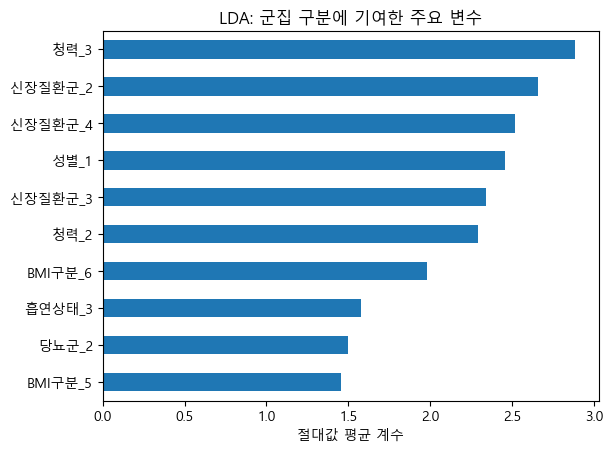

In [126]:
import matplotlib.pyplot as plt

coeff.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("LDA: 군집 구분에 기여한 주요 변수")
plt.xlabel("절대값 평균 계수")
plt.gca().invert_yaxis()
plt.show()

📌 기대 결과

항목	기대값
훈련 정확도	군집이 명확하게 나뉜다면 70~90% 이상 가능
상위 변수	군집을 분리하는 데 영향을 준 변수들 (예: '음주여부_1', '청력_3', '당뇨군_당뇨병 의심' 등)

# 추가

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # ▶ 1. 데이터: df_ord 라고 가정 (수치형 데이터프레임)
# # df_ord = ... # 필요 시 정의

# # ▶ 2. PCA 누적 설명 분산 시각화
# pca_full = PCA()
# pca_full.fit(df_ord)
# cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
# plt.axhline(y=0.9, color='r', linestyle=':')
# plt.title("Cumulative Explained Variance by PCA Components")
# plt.xlabel("Number of Components")
# plt.ylabel("Cumulative Explained Variance Ratio")
# plt.grid(True)
# plt.show()

# # ▶ 3. 주성분 수 선택 (설명 분산 90% 기준 → 5개)
# n_components = np.argmax(cumulative_variance >= 0.9) + 1
# print(f"🔎 선택된 주성분 수: {n_components} (90% 이상 설명)")

# # ▶ 4. PCA 축소
# pca = PCA(n_components=n_components)
# X_pca = pca.fit_transform(df_ord)

In [ ]:
i=10
m=KMeans(n_clusters=i, random_state=42)
labels = m.fit_predict(X_pca)

# ▶ 6. 2D 시각화를 위한 PCA 재적용 (시각화용 2차원)
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(df_ord)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels, cmap='tab10', s=30)
plt.title("PCA 2D Visualization with Cluster Colors")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, ticks=range(3), label='Cluster')
plt.grid(True)
plt.show()

#▶ 7. 클러스터 결과 추가 (선택 사항)
df_ord['cluster'] = labels

In [ ]:
i=10
m=KMeans(n_clusters=i, random_state=42)
labels = m.fit_predict(X_pca)

# ▶ 6. 2D 시각화를 위한 PCA 재적용 (시각화용 2차원)
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(df_ord)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels, cmap='tab10', s=30)
plt.title("PCA 2D Visualization with Cluster Colors")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, ticks=range(3), label='Cluster')
plt.grid(True)
plt.show()

#▶ 7. 클러스터 결과 추가 (선택 사항)
df_ord['cluster'] = labels

In [ ]:
df_ord.groupby('cluster')[df_ord.drop(columns='cluster').columns].mean().T  # 군집별 평균값 비교

In [ ]:
**군집별 차이가 미미해서 제거**
- 치석, 청력, 치아우식증유무, 평균시력, 혈색소

- 혈청크레아티닌 : 근육 대사에서 나온느 노폐물로 근육량이 많을수록 수치가 높아지는 경향-> 남성일수록 높은

In [ ]:
df_ord['cluster'].value_counts(normalize=True).sort_index()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

sil_values = silhouette_samples(X_s, labels)
df_ord['silhouette'] = sil_values

# 평균 실루엣
print("평균 실루엣 점수:", np.round(sil_values.mean(), 3))

In [ ]:
from sklearn.metrics import silhouette_score

for k in [6, 7,8]:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_s_scaled)
    score = silhouette_score(X_s_scaled, labels)
    print(f"k={k} → Silhouette Score: {score:.4f}")

In [ ]:
df_ord[col].corr()

In [ ]:
col = ['연령대', '허리둘레', '시력(좌)', '시력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       'BMI']

plt.figure(figsize=(15,15))
sns.heatmap(df_ord[col].corr(), fmt='.2f', annot=True,cbar=False);

In [ ]:
dt = pd.read_excel(os.listdir()[-1])
dt

In [ ]:
dt2 = dt.iloc[:,2:-2]
dt2.info()

In [ ]:
dt2

In [ ]:
# 각 행(군집)의 총 결제금액
row_sums = dt2.sum(axis=1)

# 비중(%) 계산
dt2_percent = dt2.div(row_sums, axis=0) * 100

# 결과 확인
dt3 = dt2_percent.round(2)

In [ ]:
dt3

In [ ]:
import pandas as pd

# 데이터 불러오기
df = pd.read_excel("/mnt/data/생활패턴유형_소비지표.xlsx")
group_col = "생활 패턴 유형"

# ▒ M (생활 패턴) - 외식, 음주, 유통, 스포츠
df["M_합"] = df["외식 및 음식"] + df["음주"] + df["유통"] + df["스포츠"]
df["M"] = df.groupby(group_col)["M_합"].transform(
    lambda x: pd.qcut(x, q=[0, 0.7, 1.0], labels=["R", "U"], duplicates="drop")
)

# ▒ T (건강검진 기반) - 군집 3만 건강, 나머지 비건강
df["T"] = df[group_col].apply(lambda x: "S" if x == 3 else "N")

# ▒ T2 (운동성향) - 스포츠 단독 사용 (기타 의료 없어서)
df["T2_합"] = df["스포츠"]
df["T2"] = df.groupby(group_col)["T2_합"].transform(
    lambda x: pd.qcut(x, q=[0, 0.7, 1.0], labels=["P", "H"], duplicates="drop")
)

# ▒ I (병원 소비금액)
df["I"] = df.groupby(group_col)["의료 및 건강"].transform(
    lambda x: pd.qcut(x, q=[0, 0.7, 1.0], labels=["T", "A"], duplicates="drop")
)

# ▒ A (보험 실행력) - 기타 보험 + 생명 보험
df["A_합"] = df["기타 보험"] + df["생명 보험"]
df["A"] = df.groupby(group_col)["A_합"].transform(
    lambda x: pd.qcut(x, q=[0, 0.7, 1.0], labels=["T", "A"], duplicates="drop")
)

# 최종 조합 (MTTIA 등으로 명명)
df["MBTIA"] = df["M"] + df["T"] + df["T2"] + df["I"] + df["A"]

import ace_tools as tools; tools.display_dataframe_to_user(name="MBTIA 분류 결과", dataframe=df)

df.head()

In [ ]:
# 기존 원-핫 대상 컬럼 제거 후 결합
df_encoded = df_encoded.drop(columns=onehot_cols)
df_encoded = pd.concat([df_encoded, df_onehot], axis=1)
df_encoded

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# ✅ 복사본 생성
df_enc = df.copy()

# ✅ 1. Ordinal Encoding 대상 컬럼
ordinal_cols = ['성별', '연령대', '키', '시력_좌', '시력_우', '요단백']
ordinal_categories = [
    [1, 2],  # 성별
    list(range(5, 19)),  # 연령대 5~18
    list(range(130, 200, 5)),  # 키 130~195 by 5
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.0],  # 시력_좌
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 1.9, 2.0],  # 시력_우
    [1., 2., 3., 4., 5., 6.]  # 요단백
]

ord_enc = OrdinalEncoder(categories=ordinal_categories)
df_enc[ordinal_cols] = ord_enc.fit_transform(df_enc[ordinal_cols])

# ✅ 2. One-Hot Encoding 대상 컬럼
dummy_cols = ['성별', '음주여부', '흡연상태', '청력_좌', '청력_우']

df_enc = pd.get_dummies(df_enc, columns=dummy_cols, prefix=dummy_cols, drop_first=False)

# ✅ 결과 확인
print(df_enc.columns)
df_enc.head()

In [ ]:
cond이상치 = org_df['청력(좌)'] == 3.0
cond이상치 = org_df['청력(우)'] == 3.0

In [ ]:
org_df['총콜레스테롤'].value_counts().sort_index()

In [ ]:
data['트리글리세라이드']

In [ ]:
['연령대', '키', '체중', '허리둘레', '시력_좌', '시력_우', '수축기혈압', '이완기혈압', '식전혈당_공복혈당',
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '혈청지오티_AST', '혈청지피티_ALT', '감마지티피', '성별_0.0', '성별_1.0', '음주여부_0.0',
       '음주여부_1.0', '흡연상태_1.0', '흡연상태_2.0', '흡연상태_3.0', '청력_좌_1.0', '청력_좌_2.0',
       '청력_좌_3.0', '청력_우_1.0', '청력_우_2.0', '청력_우_3.0']

In [ ]:
df_enc.columns

In [ ]:
3import numpy as np

# 성별 분리
is_male = df['성별'] == 1
is_female = df['성별'] == 2

# 🔹 고혈압
df['고혈압_의심'] = ((df['수축기혈압'] >= 140) | (df['이완기혈압'] >= 90)).astype(int)

# 🔹 당뇨병 / 공복혈당장애
df['당뇨병_의심'] = (df['식전혈당(공복혈당)'] >= 126).astype(int)
df['공복혈당장애'] = ((df['식전혈당(공복혈당)'] >= 100) & (df['식전혈당(공복혈당)'] < 126)).astype(int)

# 🔹 고지혈증 / 이상지질혈증
df['이상지질혈증'] = ((df['LDL콜레스테롤'] >= 160) | (df['HDL콜레스테롤'] < 40) |
                     (df['트리글리세라이드'] >= 200)).astype(int)

# 🔹 복부비만
df['복부비만'] = ((is_male & (df['허리둘레'] >= 90)) |
                (is_female & (df['허리둘레'] >= 85))).astype(int)

# 🔹 빈혈
df['빈혈_의심'] = ((is_male & (df['혈색소'] < 13)) |
                (is_female & (df['혈색소'] < 12))).astype(int)

# 🔹 신장기능 저하
df['신장기능이상'] = (df['혈청크레아티닌'] >= 1.3).astype(int)

# 🔹 간기능 이상
df['간기능이상'] = ((df['혈청지오티_AST'] >= 40) |
                  (df['혈청지피티_ALT'] >= 40) |
                  (is_male & (df['감마지티피'] >= 73)) |
                  (is_female & (df['감마지티피'] >= 38))).astype(int)

# 🔹 단백뇨
df['단백뇨_의심'] = (df['요단백'] >= 2).astype(int)

# 🔹 청력 저하 (청력 dB가 3 이상일 경우로 간주)
df['청력저하'] = ((df['청력_좌'] > 2) | (df['청력_우'] > 2)).astype(int)

# 🔹 음주 + GTP → 알코올성 간질환 의심
df['알코올간질환_의심'] = ((df['감마지티피'] > 100) & (df['음주여부'] == 1)).astype(int)

# 🔹 흡연상태 → 직접적인 판정보다는 위험인자 표시
df['흡연자'] = (df['흡연상태'] == 3).astype(int)

In [ ]:
3from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

cluster_features = [
    '연령대', '키', '체중', '허리둘레', '시력_좌', '시력_우', '수축기혈압', '이완기혈압', '식전혈당_공복혈당',
    '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
    '혈청지오티_AST', '혈청지피티_ALT', '감마지티피', '고혈압_의심',
    '성별_0.0', '성별_1.0', '음주여부_0.0', '음주여부_1.0',
    '흡연상태_1.0', '흡연상태_2.0', '흡연상태_3.0',
    '청력_좌_1.0', '청력_좌_2.0', '청력_좌_3.0',
    '청력_우_1.0', '청력_우_2.0', '청력_우_3.0'
]


X = df_enc[cluster_features].copy()



In [ ]:
df.head()